In [587]:
import pandas as pd
import zipfile
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [588]:
url = "https://databank.worldbank.org/data/download/Gender_Stats_CSV.zip"

# download the zip file into memory
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))

# list all files
print(z.namelist())



['Gender_StatsCSV.csv', 'Gender_StatsCountry.csv', 'Gender_StatsSeries.csv', 'Gender_Statscountry-series.csv', 'Gender_Statsfootnote.csv', 'Gender_Statsseries-time.csv']


In [589]:
df_data =  pd.read_csv(z.open("Gender_StatsCSV.csv"))
df_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,A woman can apply for a passport in the same w...,SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"A woman can be ""head of household"" in the same...",SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,A woman can choose where to live in the same w...,SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,A woman can obtain a judgment of divorce in th...,SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [590]:
df_country = pd.read_csv(z.open("Gender_StatsCountry.csv"))
df_country.head()


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,Middle East & North Africa,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,Multiple Indicator Cluster Survey 2022-2023,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,2000.0
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,Demographic and Health Survey 2015/16,"Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,2005.0


In [591]:
df_merged = df_data.merge(
    df_country[['Country Code', 'Region', 'Income Group']],
    on=['Country Code'],
    how='left'
)
df_merged.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,2021,2022,2023,2024,Region,Income Group
0,Africa Eastern and Southern,AFE,A woman can apply for a passport in the same w...,SG.APL.PSPT.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"A woman can be ""head of household"" in the same...",SG.HLD.HEAD.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,A woman can choose where to live in the same w...,SG.LOC.LIVE.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,A woman can obtain a judgment of divorce in th...,SG.OBT.DVRC.EQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [592]:
# -----------------------------
# 1. Define indicator groups
# -----------------------------

labor_force = [
    "SL.TLF.CACT.FE.ZS",   # Labor force participation rate, female (% of female population ages 15+)
    "SL.TLF.CACT.MA.ZS",   # Labor force participation rate, male (% of male population ages 15+)
]
employment = [
    "SL.EMP.TOTL.SP.FE.ZS",  # Employment to population ratio, 15+, female (%) (modeled ILO estimate)
    "SL.EMP.TOTL.SP.MA.ZS",  # Employment to population ratio, 15+, male (%) (modeled ILO estimate)
    "SL.EMP.WORK.FE.ZS",     # Wage and salaried workers, female (% of female employment) (modeled ILO estimate)
    "SL.EMP.WORK.MA.ZS",     # Wage and salaried workers, male (% of male employment) (modeled ILO estimate)
    "SL.EMP.SELF.FE.ZS",     # Self-employed, female (% of female employment) (modeled ILO estimate)
    "SL.EMP.SELF.MA.ZS",     # Self-employed, male (% of male employment) (modeled ILO estimate)
    "SL.EMP.VULN.FE.ZS",     # Vulnerable employment, female (% of female employment) (modeled ILO estimate)
    "SL.EMP.VULN.MA.ZS"      # Vulnerable employment, male (% of male employment) (modeled ILO estimate)
]

unemployment = [
    "SL.UEM.TOTL.FE.ZS",     # Unemployment, female (% of female labor force) (modeled ILO estimate)
    "SL.UEM.TOTL.MA.ZS",     # Unemployment, male (% of male labor force) (modeled ILO estimate)
]

sector = [
    "SL.AGR.EMPL.FE.ZS",     # Employment in agriculture, female (% of female employment) (modeled ILO estimate)
    "SL.AGR.EMPL.MA.ZS",     # Employment in agriculture, male (% of male employment) (modeled ILO estimate)
    "SL.IND.EMPL.FE.ZS",     # Employment in industry, female (% of female employment) (modeled ILO estimate)
    "SL.IND.EMPL.MA.ZS",     # Employment in industry, male (% of male employment) (modeled ILO estimate)
    "SL.SRV.EMPL.FE.ZS",     # Employment in services, female (% of female employment) (modeled ILO estimate)
    "SL.SRV.EMPL.MA.ZS"      # Employment in services, male (% of male employment) (modeled ILO estimate)
]

# Combine all indicators
indicators = labor_force + employment + unemployment + sector


In [593]:
# ------------------------------------
# 2. Filter dataset to selected indicators
# ------------------------------------

df_emp = df_merged[df_merged["Indicator Code"].isin(indicators)]


In [594]:
# ------------------------------------
# 3. Pivot to wide format
# ------------------------------------

df_long = df_emp.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code","Region","Income Group"],
    var_name="Year",
    value_name="Value"
)

df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
df_long = df_long.dropna(subset=["Value"])

df_long.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Year,Value
143108,Africa Eastern and Southern,AFE,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,1990,65.537699
143109,Africa Eastern and Southern,AFE,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,NaN,NaN,1990,78.970672
143126,Africa Western and Central,AFW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,1990,69.940137
143127,Africa Western and Central,AFW,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,NaN,NaN,1990,83.484217
143144,Arab World,ARB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,1990,19.362995


In [595]:
df_long_final = df_long.dropna(subset=["Region"])
df_long_final.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Year,Value
143972,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Low income,1990,15.789
143973,Afghanistan,AFG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Middle East & North Africa,Low income,1990,80.081
143990,Albania,ALB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Europe & Central Asia,Upper middle income,1990,50.846
143991,Albania,ALB,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Europe & Central Asia,Upper middle income,1990,72.712
144008,Algeria,DZA,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Upper middle income,1990,11.588


In [596]:
crosstab = pd.crosstab(df_long_final["Country Name"], df_long_final["Region"])
crosstab

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Country Name,,,,,,,
Afghanistan,0,0,0,602,0,0,0
Albania,0,602,0,0,0,0,0
Algeria,0,0,0,602,0,0,0
Angola,0,0,0,0,0,0,602
Argentina,0,0,602,0,0,0,0
...,...,...,...,...,...,...,...
Virgin Islands (U.S.),0,0,602,0,0,0,0
West Bank and Gaza,0,0,0,578,0,0,0
"Yemen, Rep.",0,0,0,602,0,0,0


In [597]:
def classify_indicator(code):
    if code in labor_force:
        return "Labor Force Participation"
    if code in employment:
        return "Employment"
    if code in unemployment:
        return "Unemployment"
    if code in sector:
        return "Sector Employment"
    return "Other"

df_long_final["category"] = df_long_final["Indicator Code"].apply(classify_indicator)

df_long_final.head(20)



/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/3760666614.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_final["category"] = df_long_final["Indicator Code"].apply(classify_indicator)


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Year,Value,category
143972,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Low income,1990,15.789,Labor Force Participation
143973,Afghanistan,AFG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Middle East & North Africa,Low income,1990,80.081,Labor Force Participation
143990,Albania,ALB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Europe & Central Asia,Upper middle income,1990,50.846,Labor Force Participation
143991,Albania,ALB,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Europe & Central Asia,Upper middle income,1990,72.712,Labor Force Participation
144008,Algeria,DZA,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Upper middle income,1990,11.588,Labor Force Participation
144009,Algeria,DZA,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Middle East & North Africa,Upper middle income,1990,77.007,Labor Force Participation
144062,Angola,AGO,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Sub-Saharan Africa,Lower middle income,1990,75.607,Labor Force Participation
144063,Angola,AGO,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Sub-Saharan Africa,Lower middle income,1990,79.016,Labor Force Participation
144098,Argentina,ARG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Latin America & Caribbean,Upper middle income,1990,43.085,Labor Force Participation
144099,Argentina,ARG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Latin America & Caribbean,Upper middle income,1990,76.009,Labor Force Participation


In [598]:
df_long_final["Gender"] = df_long_final["Indicator Code"].apply(
    lambda x: "Female" if ".FE." in x else ("Male" if ".MA." in x else "Total")
)
df_long_final.head(20)

/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/517016571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_final["Gender"] = df_long_final["Indicator Code"].apply(


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Year,Value,category,Gender
143972,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Low income,1990,15.789,Labor Force Participation,Female
143973,Afghanistan,AFG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Middle East & North Africa,Low income,1990,80.081,Labor Force Participation,Male
143990,Albania,ALB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Europe & Central Asia,Upper middle income,1990,50.846,Labor Force Participation,Female
143991,Albania,ALB,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Europe & Central Asia,Upper middle income,1990,72.712,Labor Force Participation,Male
144008,Algeria,DZA,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Upper middle income,1990,11.588,Labor Force Participation,Female
144009,Algeria,DZA,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Middle East & North Africa,Upper middle income,1990,77.007,Labor Force Participation,Male
144062,Angola,AGO,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Sub-Saharan Africa,Lower middle income,1990,75.607,Labor Force Participation,Female
144063,Angola,AGO,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Sub-Saharan Africa,Lower middle income,1990,79.016,Labor Force Participation,Male
144098,Argentina,ARG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Latin America & Caribbean,Upper middle income,1990,43.085,Labor Force Participation,Female
144099,Argentina,ARG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Latin America & Caribbean,Upper middle income,1990,76.009,Labor Force Participation,Male


In [599]:
df_long_final.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Year,Value,category,Gender
143972,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Low income,1990,15.789,Labor Force Participation,Female
143973,Afghanistan,AFG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Middle East & North Africa,Low income,1990,80.081,Labor Force Participation,Male
143990,Albania,ALB,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Europe & Central Asia,Upper middle income,1990,50.846,Labor Force Participation,Female
143991,Albania,ALB,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Europe & Central Asia,Upper middle income,1990,72.712,Labor Force Participation,Male
144008,Algeria,DZA,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Middle East & North Africa,Upper middle income,1990,11.588,Labor Force Participation,Female


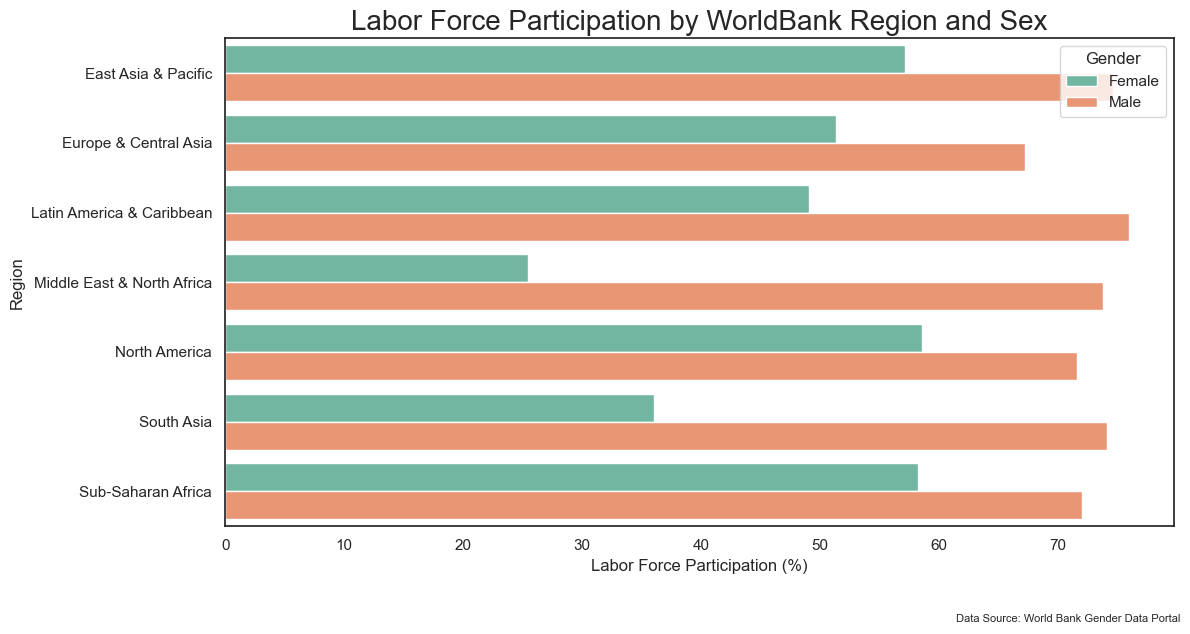

In [600]:
# Filter: only labor force participation indicators
subset = df_long_final[
    df_long_final["Indicator Name"]
    .str.contains("Labor force participation rate", case=False, na=False)
]

# Compute average labor participation per region × gender
avg = (
    subset.groupby(["Region", "Gender"])["Value"]
    .mean()
    .reset_index()
)

# Sort regions for consistent y-axis ordering
region_order = sorted(avg["Region"].unique())

plt.figure(figsize=(12, 6))

# Grouped barplot (Region on y-axis, Value on x-axis)
sns.barplot(
    data=avg,
    y="Region",
    x="Value",
    hue="Gender",
    order=region_order,
    palette="Set2"
)

# Title + styling
plt.title(
    "Labor Force Participation by WorldBank Region and Sex",
    fontsize=20
)

plt.xlabel("Labor Force Participation (%)")
plt.ylabel("Region")

plt.legend(title="Gender")

plt.tight_layout()

# DATA SOURCE 
plt.figtext(
    0.99, -0.05,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=8
)

plt.grid(False)

# ---- SAVE FIGURE ----
plt.savefig("gender_lfpr.png", dpi=300, bbox_inches="tight")

plt.show()


<Figure size 1500x600 with 0 Axes>

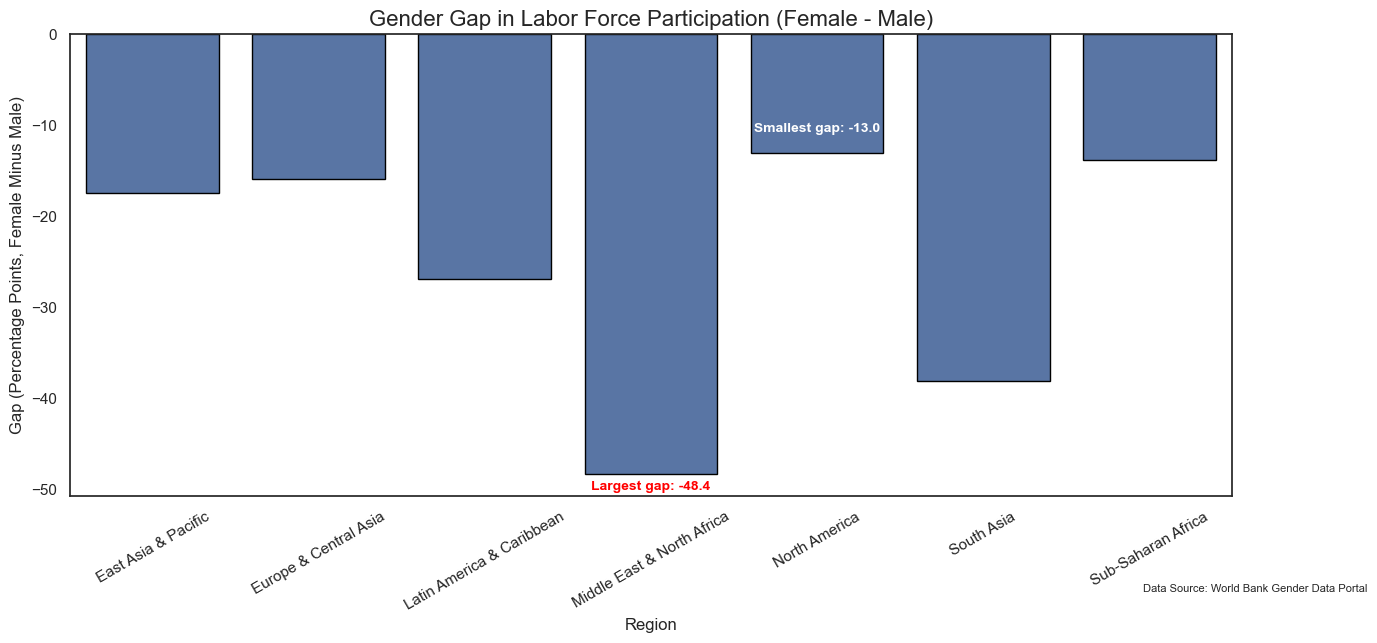

In [601]:
sns.set_style("white")
plt.figure(figsize=(15,6))

subset = df_long_final[
    df_long_final["Indicator Code"].isin([
        "SL.TLF.CACT.FE.ZS",
        "SL.TLF.CACT.MA.ZS"
    ])
]

gap = subset.pivot_table(
    index="Region",
    columns="Indicator Code",
    values="Value",
    aggfunc="mean"
).reset_index()

# Rename
gap = gap.rename(columns={
    "SL.TLF.CACT.FE.ZS": "LFPR_Female",
    "SL.TLF.CACT.MA.ZS": "LFPR_Male"
})

# Compute gender gap
gap["Gap (F - M)"] = gap["LFPR_Female"] - gap["LFPR_Male"]

plt.figure(figsize=(15,6))

sns.barplot(
    data=gap,
    x="Region",
    y="Gap (F - M)",
    edgecolor="black"
)

plt.grid(False)

plt.title("Gender Gap in Labor Force Participation (Female - Male)", fontsize=16)
plt.ylabel("Gap (Percentage Points, Female Minus Male)")
plt.xlabel("Region")
plt.xticks(rotation=30)

# -------------------------------
# FIND LARGEST & SMALLEST GAPS
# -------------------------------
min_idx = gap["Gap (F - M)"].idxmin()   # most negative (largest disadvantage)
max_idx = gap["Gap (F - M)"].idxmax()   # least negative

min_region = gap.loc[min_idx, "Region"]
max_region = gap.loc[max_idx, "Region"]

min_gap = gap.loc[min_idx, "Gap (F - M)"]  # around -50
max_gap = gap.loc[max_idx, "Gap (F - M)"]  # around -13

# -------------------------------
# ANNOTATIONS
# -------------------------------

# Largest gap (most negative)
plt.text(
    x=min_region,
    y=min_gap - 2,
    s=f"Largest gap: {min_gap:.1f}",
    ha="center",
    va="bottom",
    fontsize=10,
    color="red",
    fontweight="bold"
)

# Smallest gap (least negative)
plt.text(
    x=max_region,
    y=max_gap + 2,
    s=f"Smallest gap: {max_gap:.1f}",
    ha="center",
    va="bottom",
    fontsize=10,
    color="white",
    fontweight="bold"
)

# ----- DATA SOURCE -----
plt.figtext(
    0.99, -0.05,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=8
)

# Save
plt.savefig("gender_gap_lfpr.png", dpi=300, bbox_inches="tight")
plt.show()



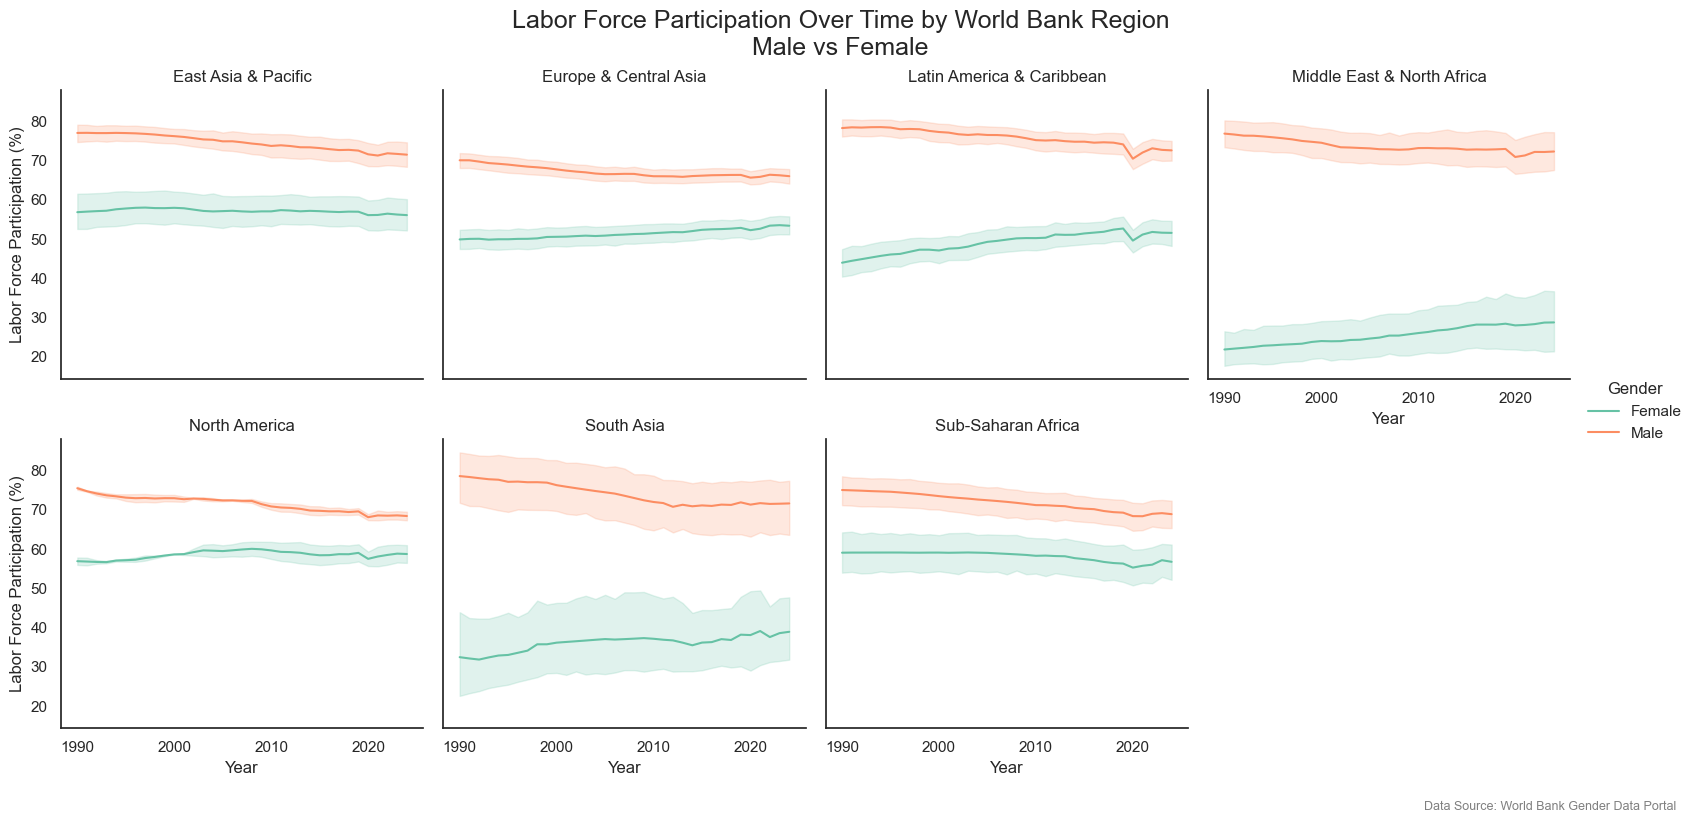

In [602]:
# Set a clean style
sns.set_theme(style="white")

# Filter only Labor Force Participation
df_temp = df_long_final[
    df_long_final["Indicator Name"].str.contains("Labor force participation rate", case=False, na=False)
]

# Sort regions alphabetically
region_order = sorted(df_temp["Region"].unique())

# Create faceted line plots by Region
g = sns.FacetGrid(
    df_temp,
    col="Region",
    col_order=region_order, 
    hue="Gender",
    col_wrap=4,
    height=4,
    sharey=True,
    sharex=True,
    palette="Set2"
)

g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Value"
)

# Add titles, legends, etc.
g.add_legend(title="Gender")
g.set_axis_labels("Year", "Labor Force Participation (%)")
g.set_titles(col_template="{col_name}")

# Title across entire figure
plt.subplots_adjust(top=0.88)
g.fig.suptitle(
    "Labor Force Participation Over Time by World Bank Region\nMale vs Female",
    fontsize=18
)

# Data source
g.fig.text(
    0.99, -0.02,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=9,
    color="gray"
)

# Save
plt.savefig("time_lfpr.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/292000482.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Sector"] = subset["Indicator Name"].apply(extract_sector)


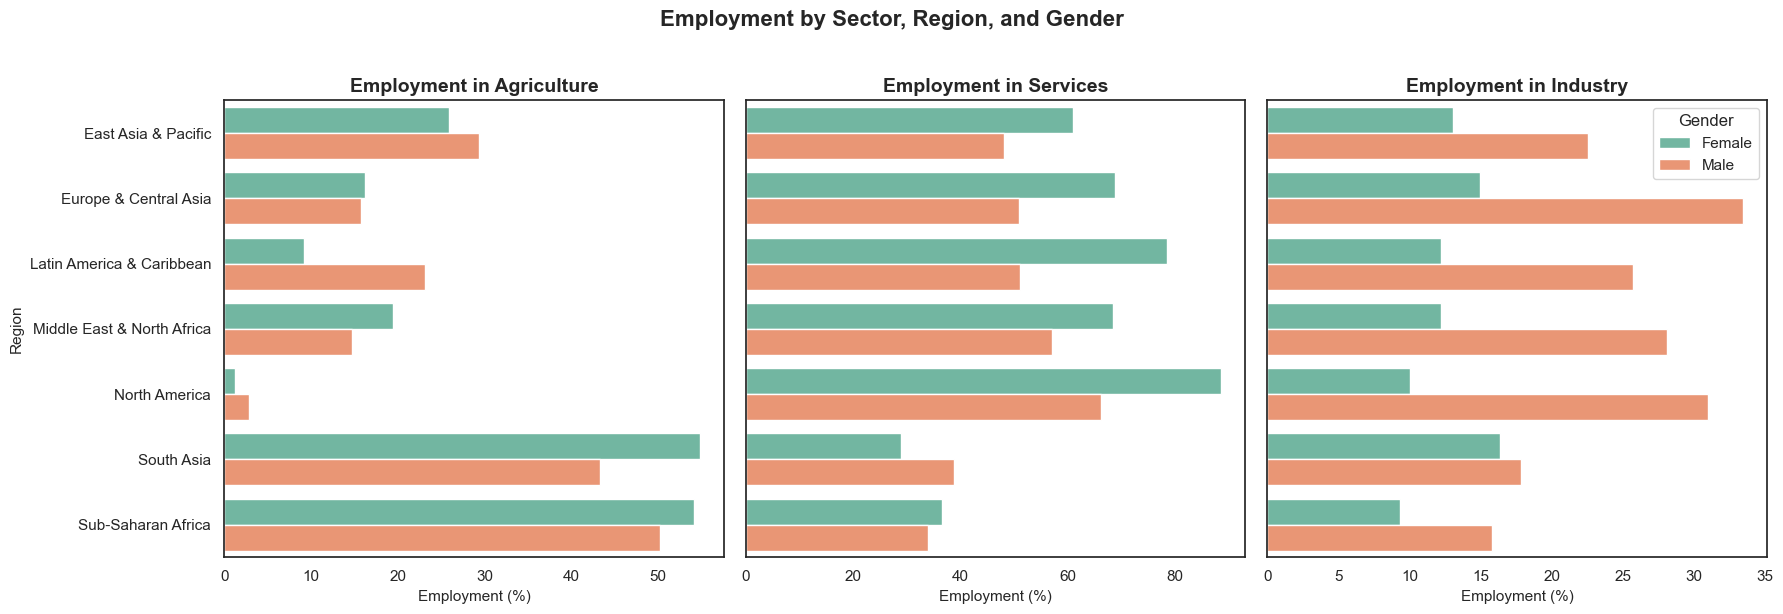

In [603]:

# Filter data for all three employment sectors
sectors = ["Employment in agriculture", "Employment in services", "Employment in industry"]

subset = df_long_final[
    df_long_final["Indicator Name"].str.contains(
        "|".join(sectors), case=False, na=False
    )
]

# Create a clean sector label
def extract_sector(indicator_name):
    if "agriculture" in indicator_name.lower():
        return "Agriculture"
    elif "services" in indicator_name.lower():
        return "Services"
    elif "industry" in indicator_name.lower():
        return "Industry"
    return "Other"

subset["Sector"] = subset["Indicator Name"].apply(extract_sector)

# Calculate average by Region, Gender, and Sector
avg = (
    subset.groupby(["Region", "Gender", "Sector"])["Value"]
    .mean()
    .reset_index()
)

# Sort regions for consistent axis ordering
region_order = avg["Region"].unique()

# Create faceted plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, sector in enumerate(["Agriculture", "Services", "Industry"]):
    sector_data = avg[avg["Sector"] == sector]
    
    sns.barplot(
        data=sector_data,
        y="Region",
        x="Value",
        hue="Gender",
        order=region_order,
        palette="Set2",
        ax=axes[idx]
    )
    
    axes[idx].set_title(f"Employment in {sector}", fontsize=14, fontweight='bold')
    axes[idx].set_xlabel("Employment (%)", fontsize=11)
    
    if idx == 0:
        axes[idx].set_ylabel("Region", fontsize=11)
    else:
        axes[idx].set_ylabel("")
    
    if idx < 2:
        axes[idx].get_legend().remove()
    else:
        axes[idx].legend(title="Gender", loc='best')

plt.suptitle("Employment by Sector, Region, and Gender", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/4167407768.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Sector"] = subset["Indicator Name"].apply(extract_sector)


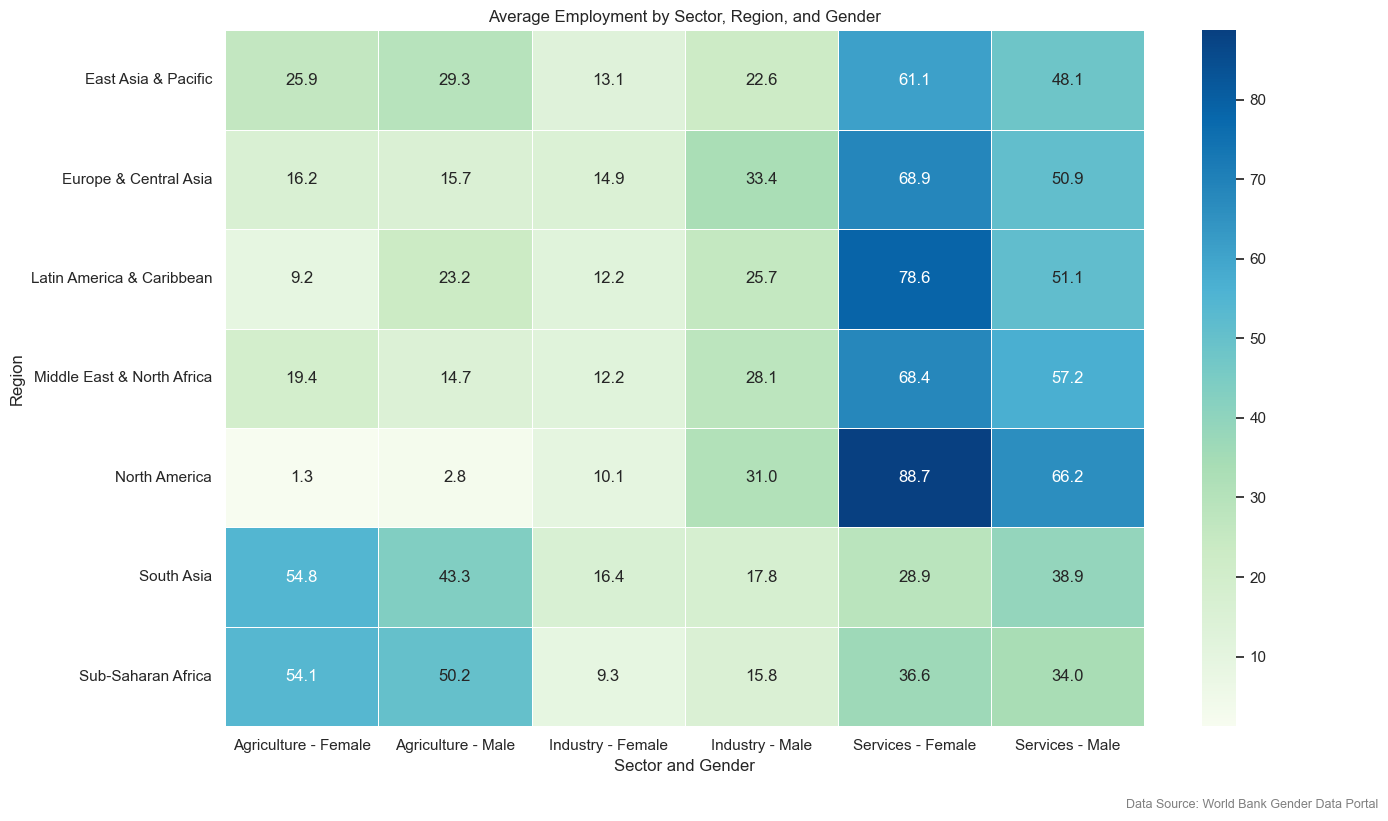

In [604]:
# Filter data for all three employment sectors
sectors = ["Employment in agriculture", "Employment in services", "Employment in industry"]

subset = df_long_final[
    df_long_final["Indicator Name"].str.contains("|".join(sectors), case=False, na=False)
]

# Create a clean sector label
def extract_sector(indicator_name):
    name = indicator_name.lower()
    if "agriculture" in name:
        return "Agriculture"
    elif "services" in name:
        return "Services"
    elif "industry" in name:
        return "Industry"
    return "Other"

subset["Sector"] = subset["Indicator Name"].apply(extract_sector)

# Compute mean values by Region, Gender, Sector
avg = (
    subset.groupby(["Region", "Gender", "Sector"])["Value"]
    .mean()
    .reset_index()
)

# ---- Create matrix for heatmap ----
# Combine Sector + Gender into one label (e.g. "Agriculture - Male")
avg["Sector_Gender"] = avg["Sector"] + " - " + avg["Gender"]

heatmap_df = avg.pivot_table(
    index="Region",
    columns="Sector_Gender",
    values="Value"
)

# ---- Plot heatmap ----
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_df,
    cmap="GnBu",
    annot=True,
    fmt=".1f",
    linewidths=.5
)

plt.title("Average Employment by Sector, Region, and Gender")
plt.ylabel("Region")
plt.xlabel("Sector and Gender")
plt.tight_layout()

# Data source (bottom right)
plt.gcf().text(
    0.99, -0.02,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=9,
    color="gray"
)

# Save
plt.savefig("heatplot_employment.png", dpi=300, bbox_inches="tight")

plt.show()


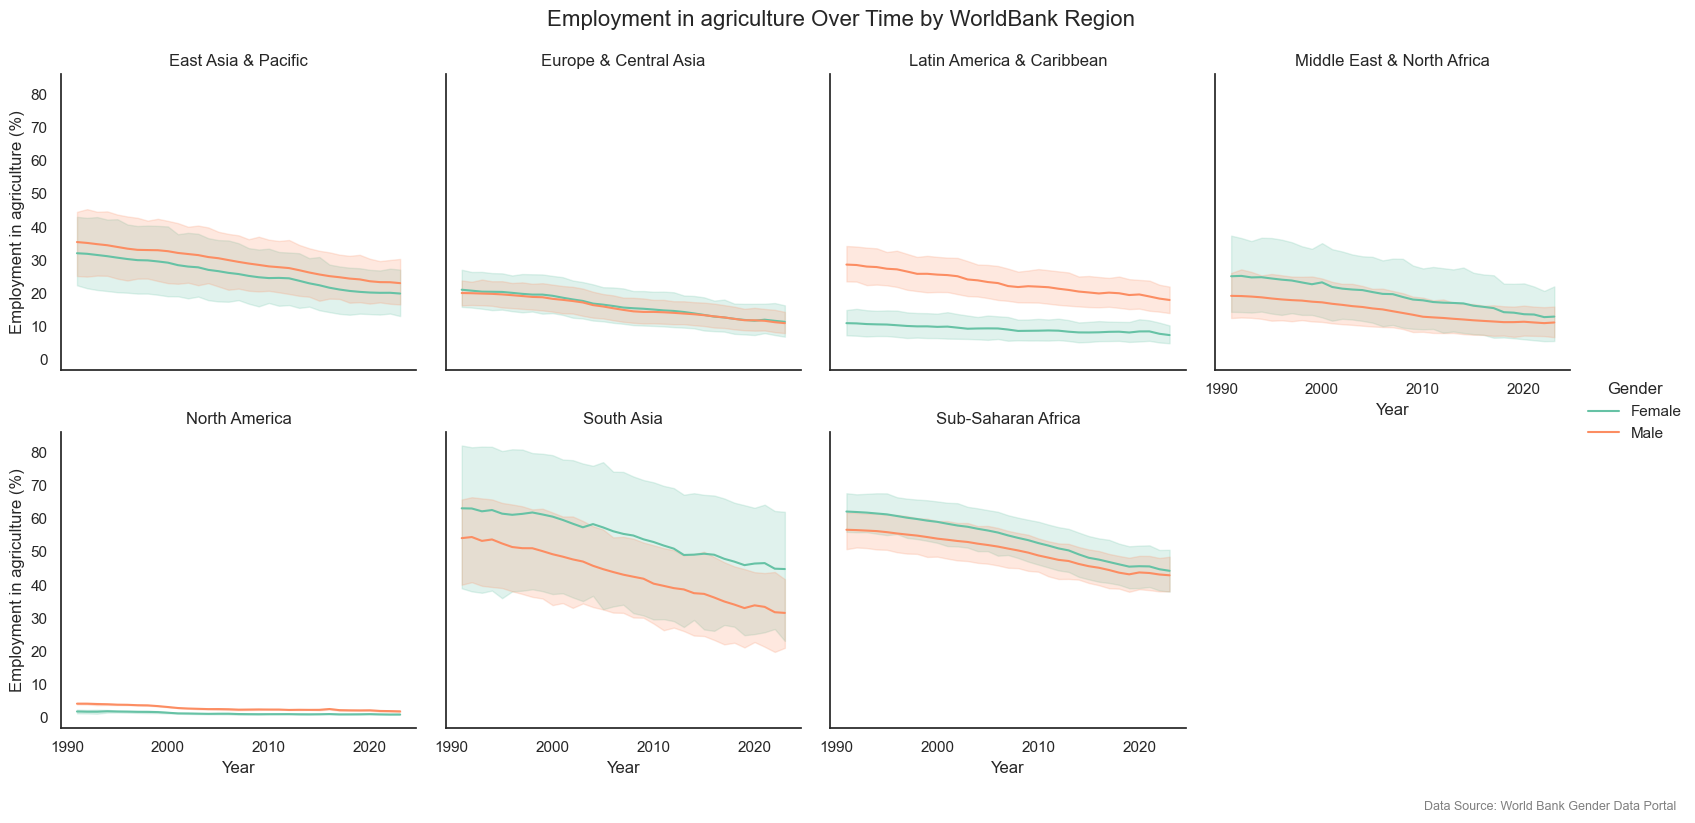

In [605]:

# Set a clean style
sns.set_theme(style="white")

# Filter only Labor Force Participation
df_temp = df_long_final[
    df_long_final["Indicator Name"].str.contains("Employment in agriculture", case=False, na=False)
]

# Sort regions alphabetically
region_order = sorted(df_temp["Region"].unique())

# Create faceted line plots by Region
g = sns.FacetGrid(
    df_temp,
    col="Region",
    col_order=region_order, 
    hue="Gender",
    col_wrap=4,
    height=4,
    sharey=True,
    sharex=True,
    palette="Set2"
)

g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Value"
)

# Add titles, legends, etc.
g.add_legend(title="Gender")
g.set_axis_labels("Year", "Employment in agriculture (%)")
g.set_titles(col_template="{col_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Employment in agriculture Over Time by WorldBank Region", fontsize=16)

g.fig.text(
    0.99, -0.02,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=9,
    color="gray"
)
plt.savefig("time_employment_agric.png", dpi=300, bbox_inches="tight")
plt.show()


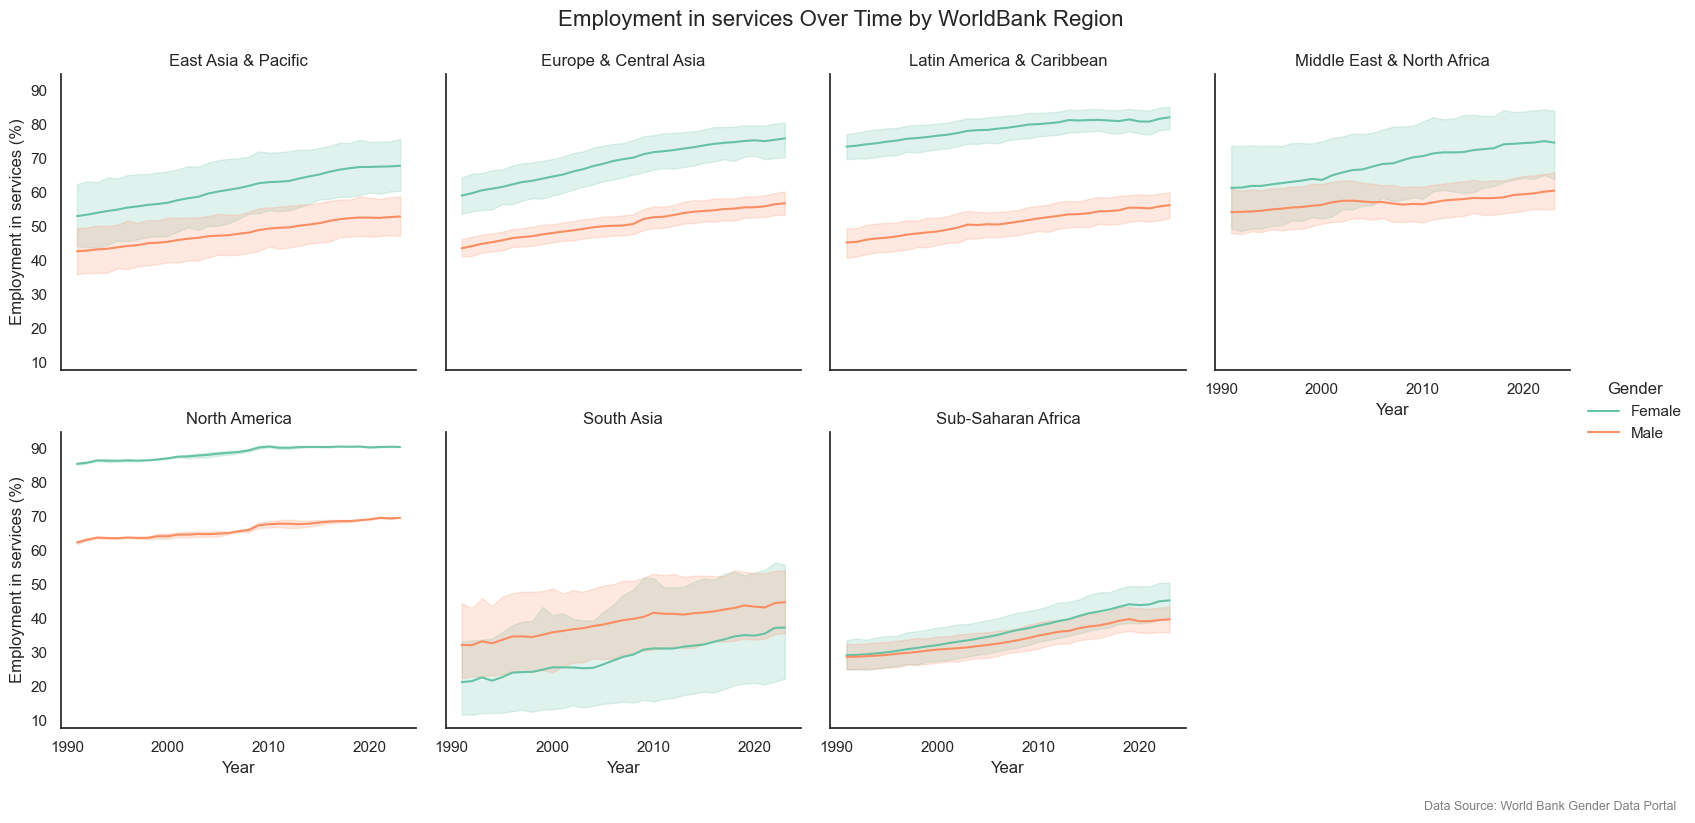

In [606]:
# Set a clean style
sns.set_theme(style="white")

# Filter only Labor Force Participation
df_temp = df_long_final[
    df_long_final["Indicator Name"].str.contains("Employment in services", case=False, na=False)
]

# Sort regions alphabetically
region_order = sorted(df_temp["Region"].unique())

# Create faceted line plots by Region
g = sns.FacetGrid(
    df_temp,
    col="Region",
    col_order=region_order, 
    hue="Gender",
    col_wrap=4,
    height=4,
    sharey=True,
    sharex=True,
    palette="Set2"
)

g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Value"
)

# Add titles, legends, etc.
g.add_legend(title="Gender")
g.set_axis_labels("Year", "Employment in services (%)")
g.set_titles(col_template="{col_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Employment in services Over Time by WorldBank Region", fontsize=16)

g.fig.text(
    0.99, -0.02,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=9,
    color="gray"
)
plt.savefig("time_service.png", dpi=300, bbox_inches="tight")

plt.show()

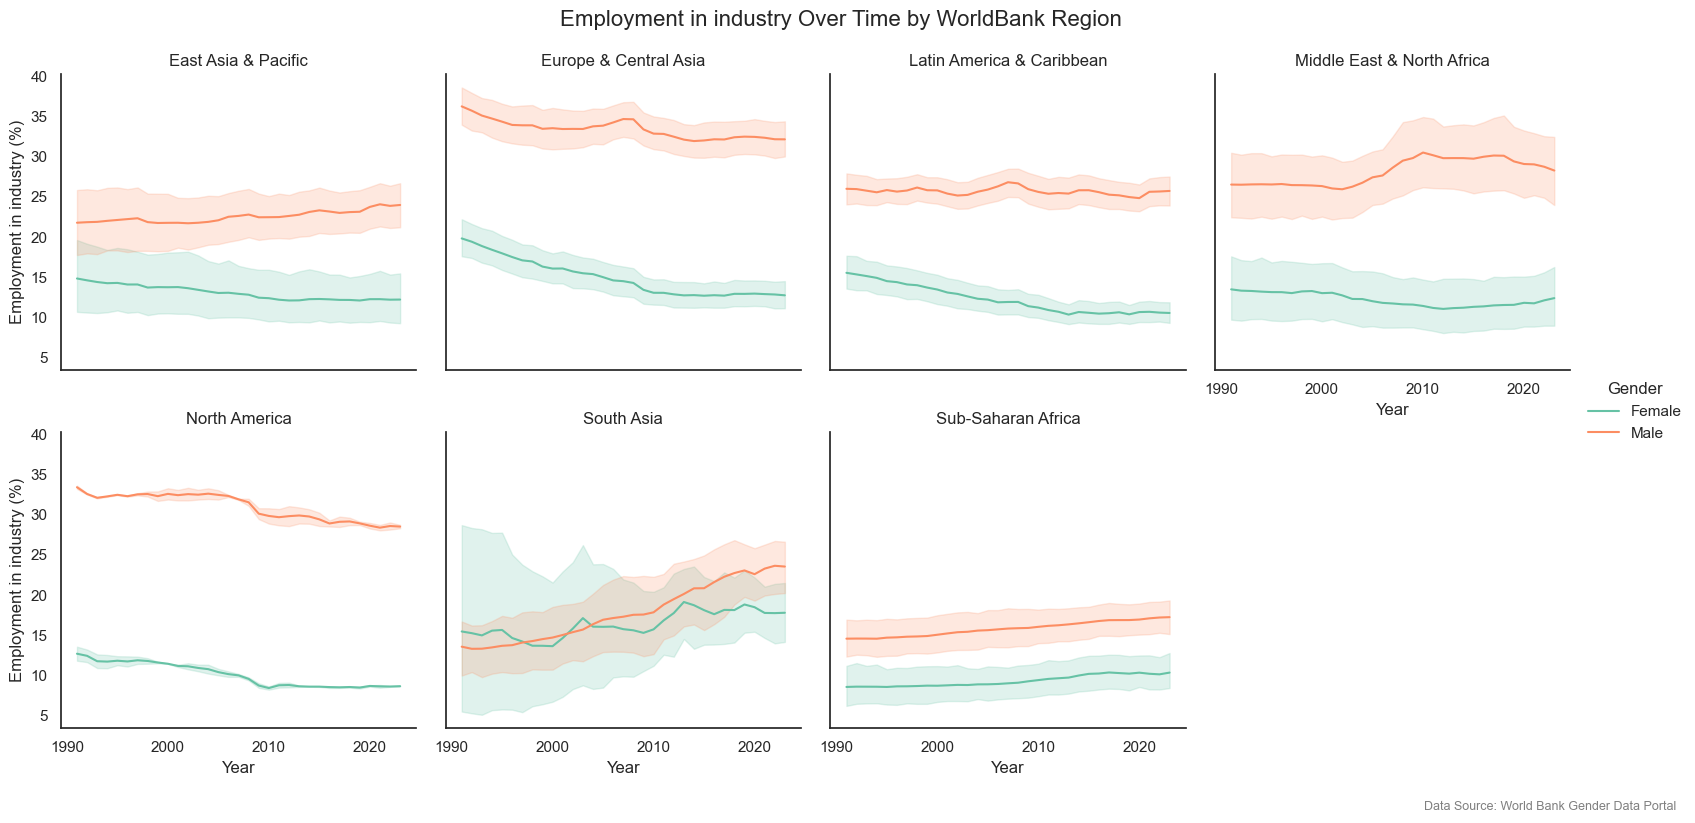

In [607]:
# Set a clean style
sns.set_theme(style="white")

# Filter only Labor Force Participation
df_temp = df_long_final[
    df_long_final["Indicator Name"].str.contains("Employment in industry", case=False, na=False)
]

# Sort regions alphabetically
region_order = sorted(df_temp["Region"].unique())

# Create faceted line plots by Region
g = sns.FacetGrid(
    df_temp,
    col="Region",
    col_order=region_order,
    hue="Gender",
    col_wrap=4,
    height=4,
    sharey=True,
    sharex=True,
    palette="Set2"
)

g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Value"
)

# Add titles, legends, etc.
g.add_legend(title="Gender")
g.set_axis_labels("Year", "Employment in industry (%)")
g.set_titles(col_template="{col_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Employment in industry Over Time by WorldBank Region", fontsize=16)

g.fig.text(
    0.99, -0.02,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=9,
    color="gray"
)
plt.savefig("time_industry.png", dpi=300, bbox_inches="tight")

plt.show()

/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/298103660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_emp["Indicator"] = subset_emp["Indicator Name"].replace({


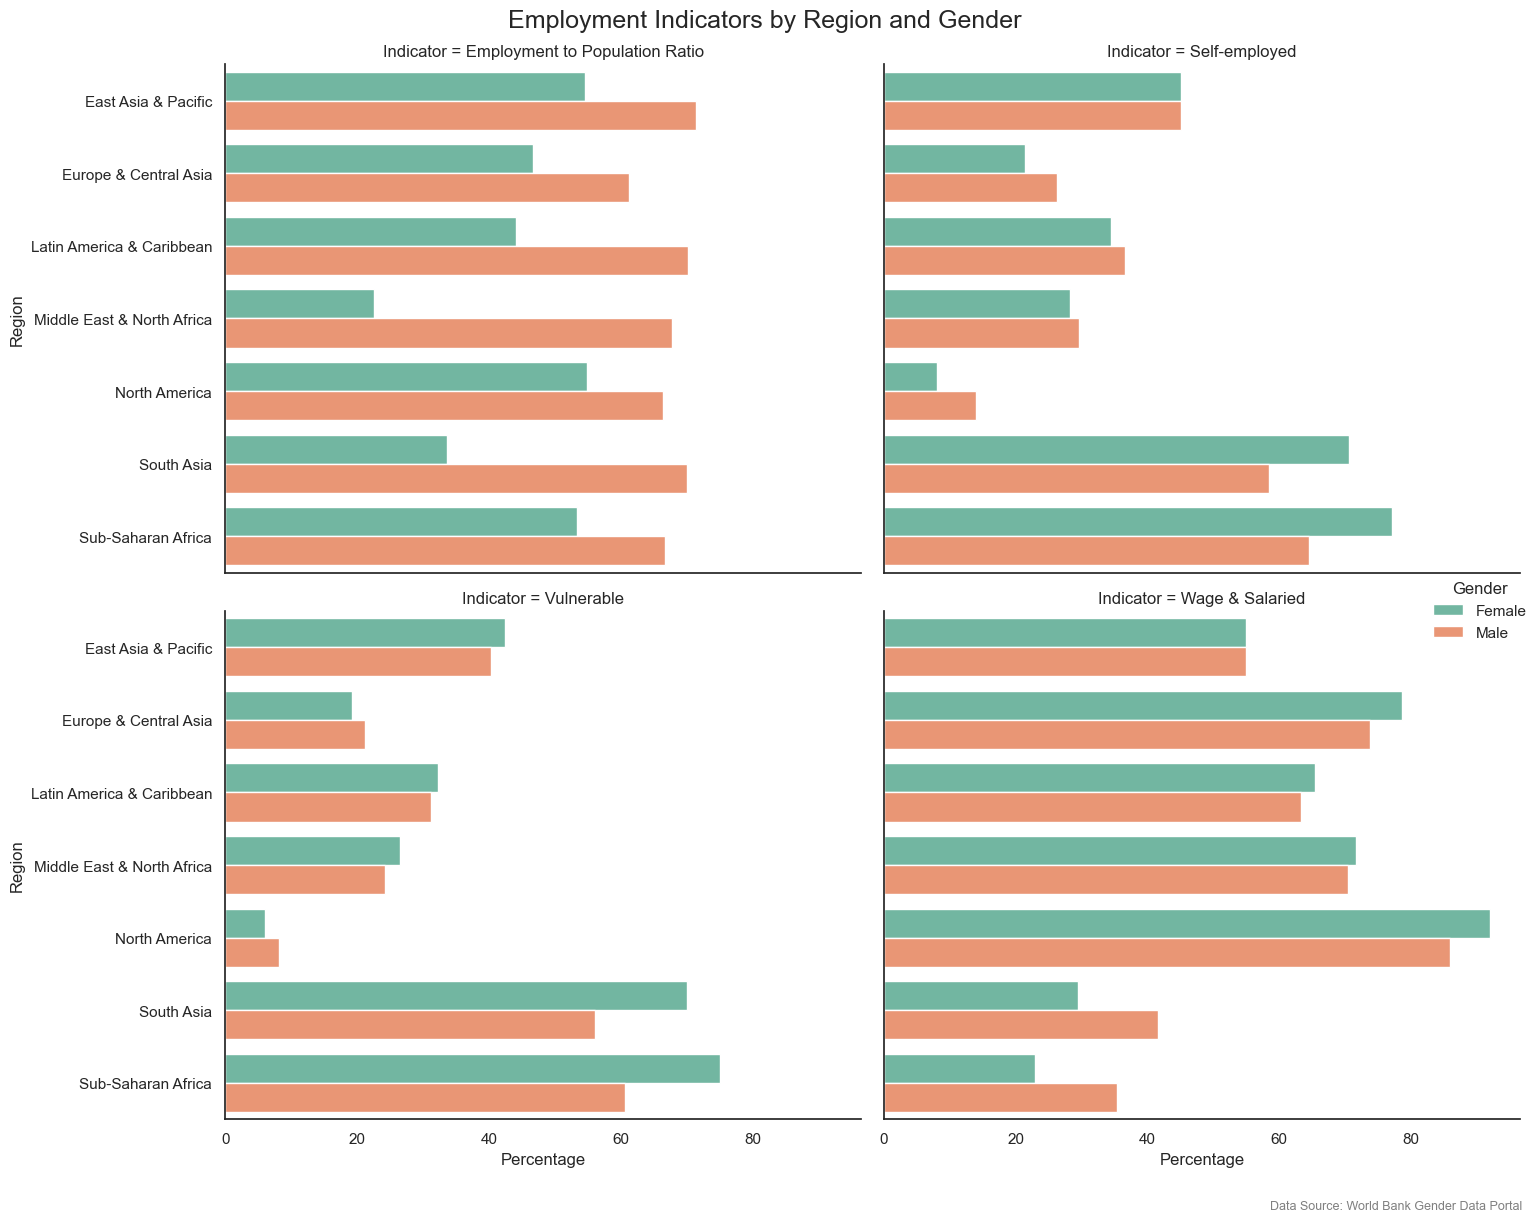

In [608]:

# ---- EMPLOYMENT PLOT ---------------------------------------------------------

# Filter employment variables
subset_emp = df_long_final[df_long_final["Indicator Code"].isin(employment)]

# Clean up indicator labels
subset_emp["Indicator"] = subset_emp["Indicator Name"].replace({
    "Employment to population ratio, 15+, female (%) (modeled ILO estimate)": "Employment to Population Ratio",
    "Employment to population ratio, 15+, male (%) (modeled ILO estimate)": "Employment to Population Ratio",
    "Wage and salaried workers, female (% of female employment) (modeled ILO estimate)": "Wage & Salaried",
    "Wage and salaried workers, male (% of male employment) (modeled ILO estimate)": "Wage & Salaried",
    "Self-employed, female (% of female employment) (modeled ILO estimate)": "Self-employed",
    "Self-employed, male (% of male employment) (modeled ILO estimate)": "Self-employed",
    "Vulnerable employment, female (% of female employment) (modeled ILO estimate)": "Vulnerable",
    "Vulnerable employment, male (% of male employment) (modeled ILO estimate)": "Vulnerable",
})

# Compute mean
avg_emp = (
    subset_emp.groupby(["Region", "Gender", "Indicator"])["Value"]
    .mean()
    .reset_index()
)

region_order = avg_emp["Region"].unique()

# Facet plot
g = sns.FacetGrid(
    avg_emp,
    col="Indicator",
    col_wrap=2,
    height=6,
    aspect=1.2,
    sharey=True
)

g.map_dataframe(
    sns.barplot,
    y="Region",
    x="Value",
    hue="Gender",
    order=region_order,
    palette="Set2"
)

g.add_legend(title="Gender")
g.fig.suptitle("Employment Indicators by Region and Gender", fontsize=18, y=0.98)


g.fig.text(
    0.99, -0.02,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=9,
    color="gray"
)
g.set_xlabels("Percentage")

plt.tight_layout()

plt.savefig("Emp_indict.png", dpi=300, bbox_inches="tight")
plt.show()



/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/1415893480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_unemp["Indicator"] = subset_unemp["Indicator Name"].replace({


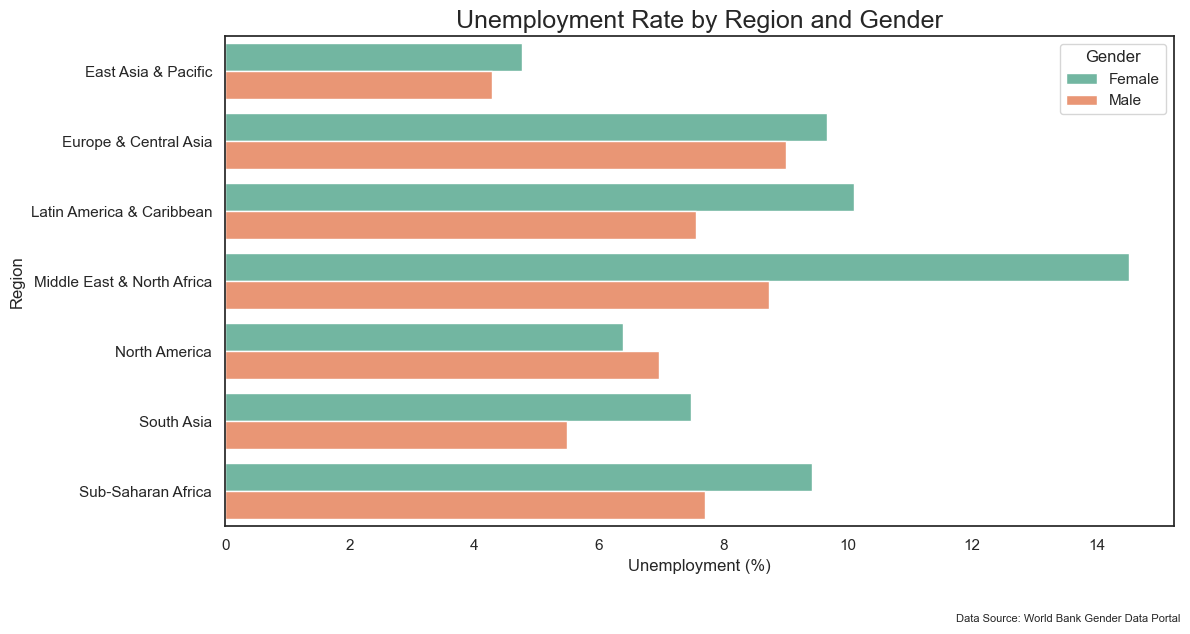

In [609]:
# ---- UNEMPLOYMENT PLOT -------------------------------------------------------

subset_unemp = df_long_final[df_long_final["Indicator Code"].isin(unemployment)]

subset_unemp["Indicator"] = subset_unemp["Indicator Name"].replace({
    "Unemployment, female (% of female labor force) (modeled ILO estimate)": "Unemployment",
    "Unemployment, male (% of male labor force) (modeled ILO estimate)": "Unemployment",
})

avg_unemp = (
    subset_unemp.groupby(["Region", "Gender"])["Value"]
    .mean()
    .reset_index()
)

region_order = avg_unemp["Region"].unique()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_unemp,
    y="Region",
    x="Value",
    hue="Gender",
    order=region_order,
    palette="Set2"
)

plt.title("Unemployment Rate by Region and Gender", fontsize=18)
plt.xlabel("Unemployment (%)")
plt.ylabel("Region")
plt.legend(title="Gender")

plt.tight_layout()

# ----- DATA SOURCE -----
plt.figtext(
    0.99, -0.05,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=8
)

# Save
plt.savefig("unemployment.png", dpi=300, bbox_inches="tight")
plt.show()


In [610]:
ssa_df = df_long_final[df_long_final['Region'] == 'Sub-Saharan Africa']

ssa_df.head(10)


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Year,Value,category,Gender
144062,Angola,AGO,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Sub-Saharan Africa,Lower middle income,1990,75.607,Labor Force Participation,Female
144063,Angola,AGO,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Sub-Saharan Africa,Lower middle income,1990,79.016,Labor Force Participation,Male
144332,Benin,BEN,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Sub-Saharan Africa,Lower middle income,1990,57.112,Labor Force Participation,Female
144333,Benin,BEN,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Sub-Saharan Africa,Lower middle income,1990,88.702,Labor Force Participation,Male
144422,Botswana,BWA,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Sub-Saharan Africa,Upper middle income,1990,49.051,Labor Force Participation,Female
144423,Botswana,BWA,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Sub-Saharan Africa,Upper middle income,1990,78.100,Labor Force Participation,Male
144512,Burkina Faso,BFA,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Sub-Saharan Africa,Low income,1990,79.377,Labor Force Participation,Female
144513,Burkina Faso,BFA,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Sub-Saharan Africa,Low income,1990,88.767,Labor Force Participation,Male
144530,Burundi,BDI,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Sub-Saharan Africa,Low income,1990,90.451,Labor Force Participation,Female
144531,Burundi,BDI,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,Sub-Saharan Africa,Low income,1990,89.713,Labor Force Participation,Male


In [611]:
def latest_year_df(df):
    """Return the latest-year data for each country, indicator, and gender."""
    return (
        df.sort_values("Year")
          .groupby(["Country Name", "Indicator Code", "Gender"])
          .tail(1)
    )



In [612]:
agriculture_codes = ["SL.AGR.EMPL.FE.ZS", "SL.AGR.EMPL.MA.ZS"]
industry_codes    = ["SL.IND.EMPL.FE.ZS", "SL.IND.EMPL.MA.ZS"]
services_codes    = ["SL.SRV.EMPL.FE.ZS", "SL.SRV.EMPL.MA.ZS"]

unemployment_codes = ["SL.UEM.TOTL.FE.ZS", "SL.UEM.TOTL.MA.ZS"]

employment_codes = ["SL.EMP.TOTL.SP.FE.ZS","SL.EMP.TOTL.SP.MA.ZS"]

labor_codes = ["SL.TLF.CACT.FE.ZS", "SL.TLF.CACT.MA.ZS"]



In [613]:
def create_employment_dashboard(df, employment_codes, region_name="Sub-Saharan Africa"):
    
    # Filter data to the chosen indicators
    data = df[df["Indicator Code"].isin(employment_codes)]
    
    # Define colors
    FEMALE_COLOR = "#E88D7A"
    MALE_COLOR = "#7DBFB0"
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)
    
    # ==========================================
    # Set the target year
    # ==========================================
    max_year = 2023       # <-- UPDATED HERE
    data_year = data[data['Year'] == max_year]

    # ==========================================
    # Top 10 countries by gender (current year)
    # ==========================================
    top10_male = (
        data_year[data_year["Gender"] == "Male"]
        .sort_values("Value", ascending=False)
        .head(10)
    )
    
    top10_female = (
        data_year[data_year["Gender"] == "Female"]
        .sort_values("Value", ascending=False)
        .head(10)
    )
    
    # Identify top 2 countries for trends
    top2_male_countries = top10_male.head(2)["Country Name"].tolist()
    top2_female_countries = top10_female.head(2)["Country Name"].tolist()
    
    # ==========================================
    # Trend window (15 years prior to max_year)
    # ==========================================
    min_year = max_year - 15  # last 15 years
    
    trend_data = data[
        (data['Country Name'].isin(top2_male_countries + top2_female_countries)) &
        (data['Year'] >= min_year)
    ]
    
    # Y-axis limits for trend plots
    y_limit_min = 72
    y_max = trend_data['Value'].max()
    y_limit_max = y_max + (y_max - y_limit_min) * 0.1
    
    # ==========================================
    # TOP 10 MALE COUNTRIES (2023)
    # ==========================================
    ax_male_2023 = fig.add_subplot(gs[0, 0])
    
    top10_male_sorted = top10_male.sort_values("Value", ascending=True)
    
    ax_male_2023.barh(
        top10_male_sorted["Country Name"],
        top10_male_sorted["Value"],
        color=MALE_COLOR,
        alpha=0.85,
        edgecolor="black",
        linewidth=0.5
    )
    
    ax_male_2023.set_xlabel("Employment Rate (%)", fontsize=11, fontweight='bold')
    ax_male_2023.set_ylabel("Country", fontsize=11, fontweight='bold')
    ax_male_2023.set_title(f"Top 10 Countries - Male Employment in {max_year}", fontsize=13, fontweight='bold')
    ax_male_2023.grid(axis='x', alpha=0.3, linestyle='--')
    
    # ==========================================
    # TOP 10 FEMALE COUNTRIES (2023)
    # ==========================================
    ax_female_2023 = fig.add_subplot(gs[1, 0])
    
    top10_female_sorted = top10_female.sort_values("Value", ascending=True)
    
    ax_female_2023.barh(
        top10_female_sorted["Country Name"],
        top10_female_sorted["Value"],
        color=FEMALE_COLOR,
        alpha=0.85,
        edgecolor="black",
        linewidth=0.5
    )
    
    ax_female_2023.set_xlabel("Employment Rate (%)", fontsize=11, fontweight='bold')
    ax_female_2023.set_ylabel("Country", fontsize=11, fontweight='bold')
    ax_female_2023.set_title(f"Top 10 Countries - Female Employment in {max_year}", fontsize=13, fontweight='bold')
    ax_female_2023.grid(axis='x', alpha=0.3, linestyle='--')
    
    # ==========================================
    # MALE TREND PLOTS
    # ==========================================
    male_trend_data = data[
        (data['Gender'] == 'Male') &
        (data['Country Name'].isin(top2_male_countries)) &
        (data['Year'] >= min_year)
    ]
    
    # Plot: First male country
    ax_male1 = fig.add_subplot(gs[0, 1])
    c1_data = male_trend_data[male_trend_data['Country Name'] == top2_male_countries[0]].sort_values('Year')
    
    ax_male1.plot(c1_data['Year'], c1_data['Value'],
                  marker='o', linewidth=2.5, markersize=6, color=MALE_COLOR, alpha=0.85)
    
    ax_male1.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_male1.set_ylabel("Employment Rate (%)", fontsize=10, fontweight='bold')
    ax_male1.set_title(f"#{1}: {top2_male_countries[0]} (Male)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_male1.grid(alpha=0.3, linestyle='--')
    ax_male1.set_ylim(y_limit_min, y_limit_max)
    ax_male1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Plot: Second male country
    ax_male2 = fig.add_subplot(gs[0, 2])
    c2_data = male_trend_data[male_trend_data['Country Name'] == top2_male_countries[1]].sort_values('Year')
    
    ax_male2.plot(c2_data['Year'], c2_data['Value'],
                  marker='o', linewidth=2.5, markersize=6, color=MALE_COLOR, alpha=0.85)
    
    ax_male2.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_male2.set_ylabel("Employment Rate (%)", fontsize=10, fontweight='bold')
    ax_male2.set_title(f"#{2}: {top2_male_countries[1]} (Male)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_male2.grid(alpha=0.3, linestyle='--')
    ax_male2.set_ylim(y_limit_min, y_limit_max)
    ax_male2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # ==========================================
    # FEMALE TREND PLOTS
    # ==========================================
    female_trend_data = data[
        (data['Gender'] == 'Female') &
        (data['Country Name'].isin(top2_female_countries)) &
        (data['Year'] >= min_year)
    ]
    
    # Plot: First female country
    ax_female1 = fig.add_subplot(gs[1, 1])
    c1_f_data = female_trend_data[female_trend_data['Country Name'] == top2_female_countries[0]].sort_values('Year')
    
    ax_female1.plot(c1_f_data['Year'], c1_f_data['Value'],
                    marker='o', linewidth=2.5, markersize=6, color=FEMALE_COLOR, alpha=0.85)
    
    ax_female1.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_female1.set_ylabel("Employment Rate (%)", fontsize=10, fontweight='bold')
    ax_female1.set_title(f"#{1}: {top2_female_countries[0]} (Female)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_female1.grid(alpha=0.3, linestyle='--')
    ax_female1.set_ylim(y_limit_min, y_limit_max)
    ax_female1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Plot: Second female country
    ax_female2 = fig.add_subplot(gs[1, 2])
    c2_f_data = female_trend_data[female_trend_data['Country Name'] == top2_female_countries[1]].sort_values('Year')
    
    ax_female2.plot(c2_f_data['Year'], c2_f_data['Value'],
                    marker='o', linewidth=2.5, markersize=6, color=FEMALE_COLOR, alpha=0.85)
    
    ax_female2.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_female2.set_ylabel("Employment Rate (%)", fontsize=10, fontweight='bold')
    ax_female2.set_title(f"#{2}: {top2_female_countries[1]} (Female)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_female2.grid(alpha=0.3, linestyle='--')
    ax_female2.set_ylim(y_limit_min, y_limit_max)
    ax_female2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # ==========================================
    # Main Title
    # ==========================================
    plt.suptitle(
        f"Employment to Population Ratio Dashboard - {region_name} ({max_year})\nCurrent Leaders and Their 15-Year Trends",
        fontsize=16,
        fontweight='bold',
        y=0.99
    )
    
    plt.tight_layout()
    # ----- DATA SOURCE -----
    plt.figtext(
    0.99, -0.05,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=8)

    # Save the figure
    plt.savefig("Employment.png", dpi=300, bbox_inches="tight")

    # Display the plot
    plt.show()

   


/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/835746686.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


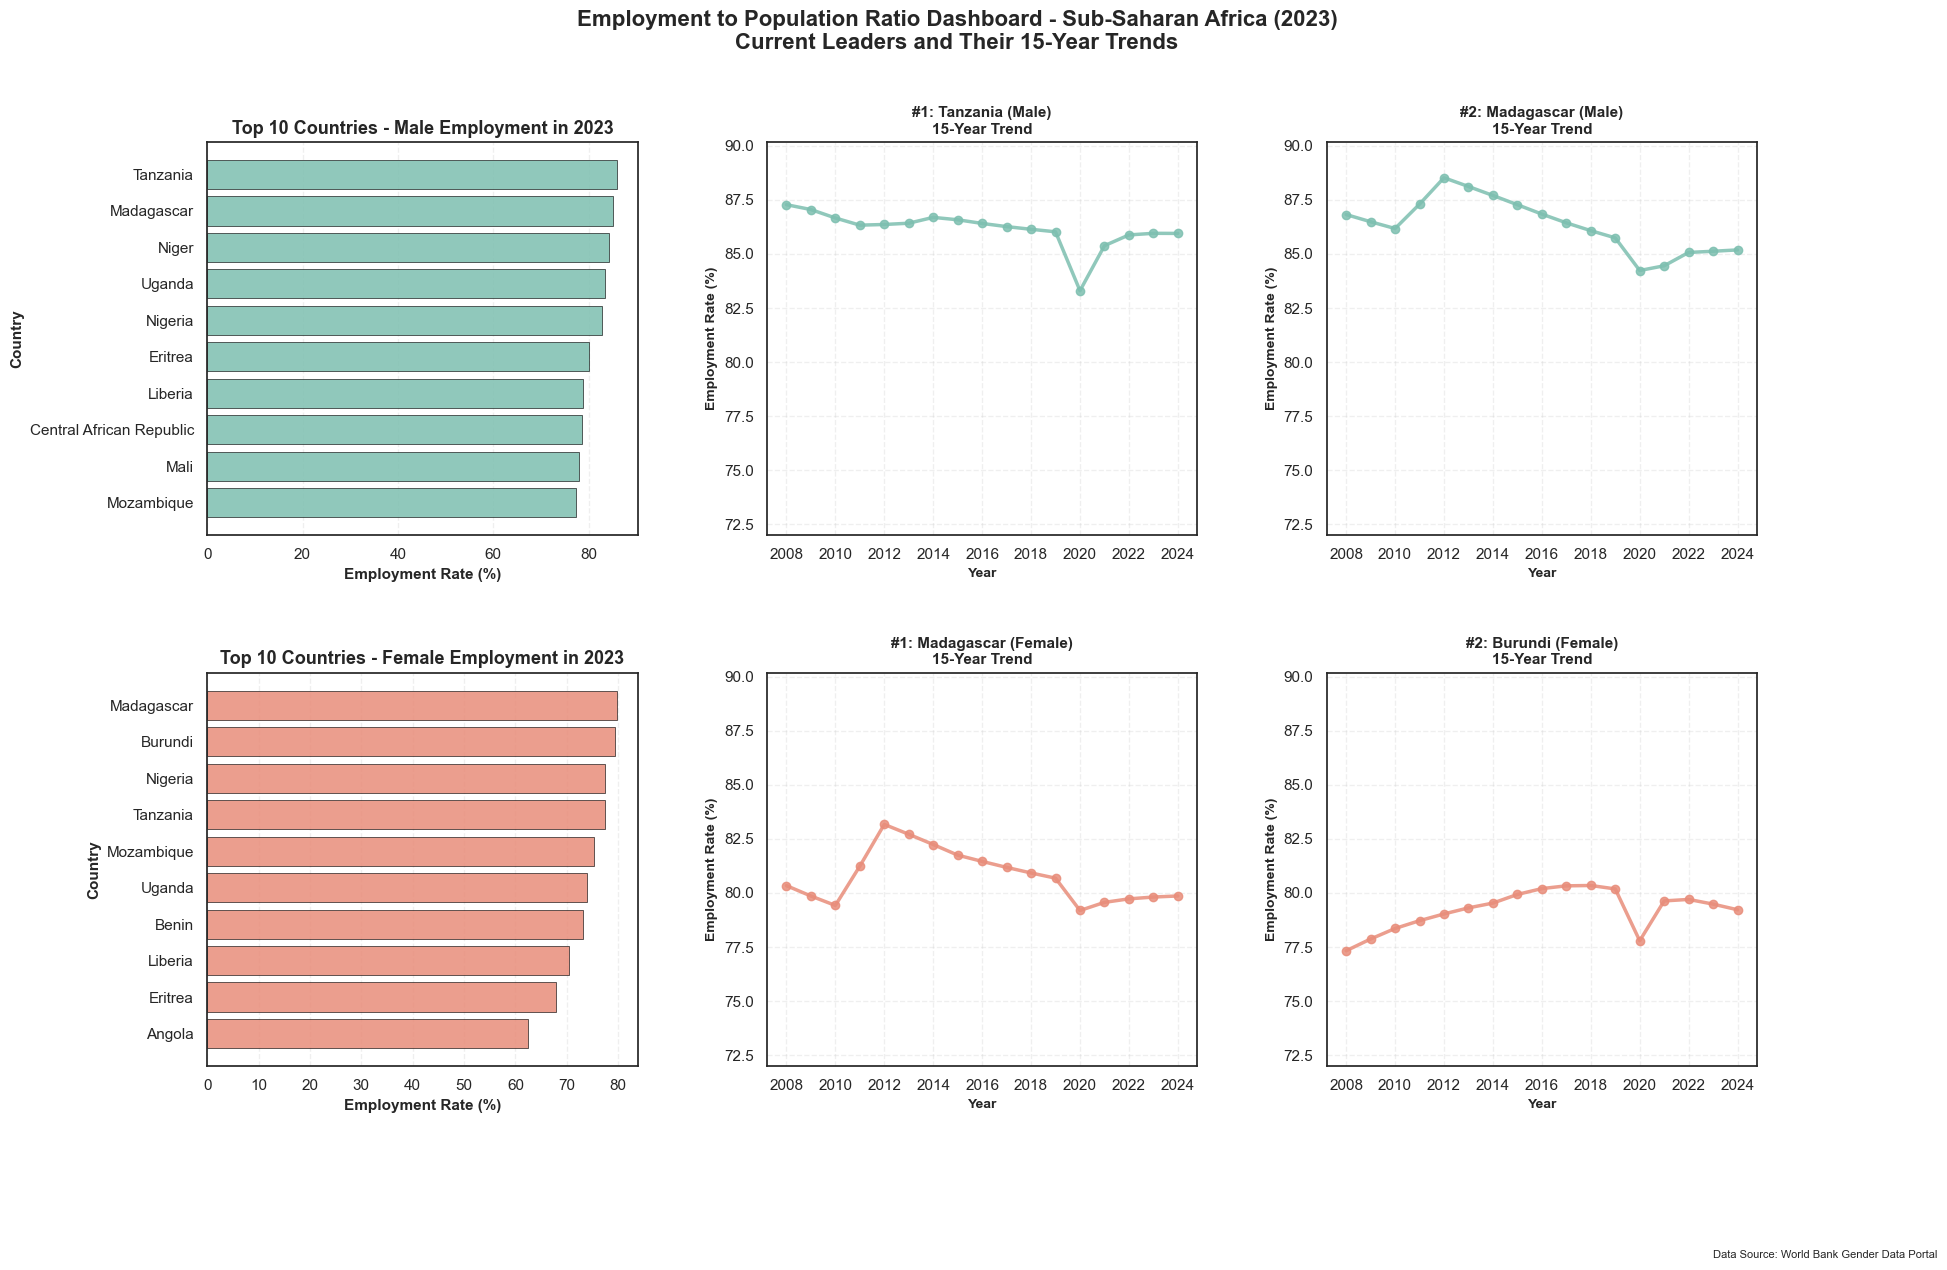

In [614]:

create_employment_dashboard(
    ssa_df,
    employment_codes,
    region_name="Sub-Saharan Africa")


In [615]:
def create_sector_dashboard_with_income(df, employment_codes,
                                       agriculture_codes, industry_codes, services_codes,
                                       region_name="Sub-Saharan Africa"):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors

    max_year = 2023

    # Base gender colors
    FEMALE_COLOR = "#E88D7A"
    MALE_COLOR = "#7DBFB0"

    # Slightly darker shades for sectors
    def darken_color(color, factor=0.8):
        c = mcolors.to_rgb(color)
        return (c[0]*factor, c[1]*factor, c[2]*factor)

    sector_colors = {
        "Male": {
            "Agriculture": darken_color(MALE_COLOR, 0.8),
            "Industry": darken_color(MALE_COLOR, 0.6),
            "Services": darken_color(MALE_COLOR, 0.4)
        },
        "Female": {
            "Agriculture": darken_color(FEMALE_COLOR, 0.8),
            "Industry": darken_color(FEMALE_COLOR, 0.6),
            "Services": darken_color(FEMALE_COLOR, 0.4)
        }
    }

    # ---- STEP 1: Determine top 10 countries based on employment codes ----
    data_2023 = df[df["Year"] == max_year]

    top10_male = (
        data_2023[(data_2023["Indicator Code"].isin(employment_codes)) & 
                  (data_2023["Gender"] == "Male")]
        .sort_values("Value", ascending=False)
        .head(10)["Country Name"]
        .tolist()
    )

    top10_female = (
        data_2023[(data_2023["Indicator Code"].isin(employment_codes)) & 
                  (data_2023["Gender"] == "Female")]
        .sort_values("Value", ascending=False)
        .head(10)["Country Name"]
        .tolist()
    )

    # ---- STEP 2: Create figure with 2 rows, 4 columns ----
    fig, axes = plt.subplots(2, 4, figsize=(28, 12), sharey=False)
    sector_groups = {"Agriculture": agriculture_codes, "Industry": industry_codes, "Services": services_codes}

    for row, (gender, top10_countries) in enumerate([("Male", top10_male), ("Female", top10_female)]):
        for col, (sector_label, code_list) in enumerate(sector_groups.items()):
            ax = axes[row, col]

            # Filter data for this sector, this gender, top10 countries
            sector_df = df[
                (df["Indicator Code"].isin(code_list)) &
                (df["Gender"] == gender) &
                (df["Year"] == max_year) &
                (df["Country Name"].isin(top10_countries))
            ]

            # Sort from highest to lowest value
            sector_df = sector_df.sort_values("Value", ascending=False)

            # Plot
            ax.barh(sector_df["Country Name"], sector_df["Value"],
                    color=sector_colors[gender][sector_label], edgecolor="black", alpha=0.85)
            ax.set_xlabel("Employment Rate (%)", fontsize=11)
            ax.set_title(f"{gender} - {sector_label}", fontsize=13, fontweight="bold")
            ax.grid(axis="x", linestyle="--", alpha=0.3)
            ax.invert_yaxis()  # So highest value is on top

        # ---- STEP 3: Income Group plot in last column ----
        ax_income = axes[row, 3]  # Last column

        income_df = df[(df["Country Name"].isin(top10_countries)) & (df["Year"] == max_year)]
        income_df = income_df[["Country Name", "Income Group"]].drop_duplicates()
        income_df = income_df.sort_values("Country Name", ascending=False)

        # Assign a color for each income group
        income_groups = income_df["Income Group"].unique()
        colors = plt.cm.tab20.colors[:len(income_groups)]
        color_map = dict(zip(income_groups, colors))

        ax_income.barh(income_df["Country Name"], [1]*len(income_df),
                       color=income_df["Income Group"].map(color_map), edgecolor="black")
        ax_income.set_xlabel("Income Group", fontsize=11)
        ax_income.set_yticks(range(len(income_df)))
        ax_income.set_yticklabels(income_df["Country Name"])
        ax_income.set_xticks([])
        ax_income.set_title(f"{gender} - Income Group", fontsize=13, fontweight="bold")

        # Legend
        handles = [plt.Rectangle((0,0),1,1,color=color_map[grp]) for grp in income_groups]
        ax_income.legend(handles, income_groups, title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f"Sector Employment & Income Group - Top 10 Countries ({region_name}, {max_year})",
                 fontsize=16, fontweight="bold")
    plt.tight_layout()

    plt.tight_layout()
    # ----- DATA SOURCE -----
    plt.figtext(
    0.99, -0.05,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=8)

    # Save the figure
    plt.savefig("Employment2.png", dpi=300, bbox_inches="tight")

    plt.show()


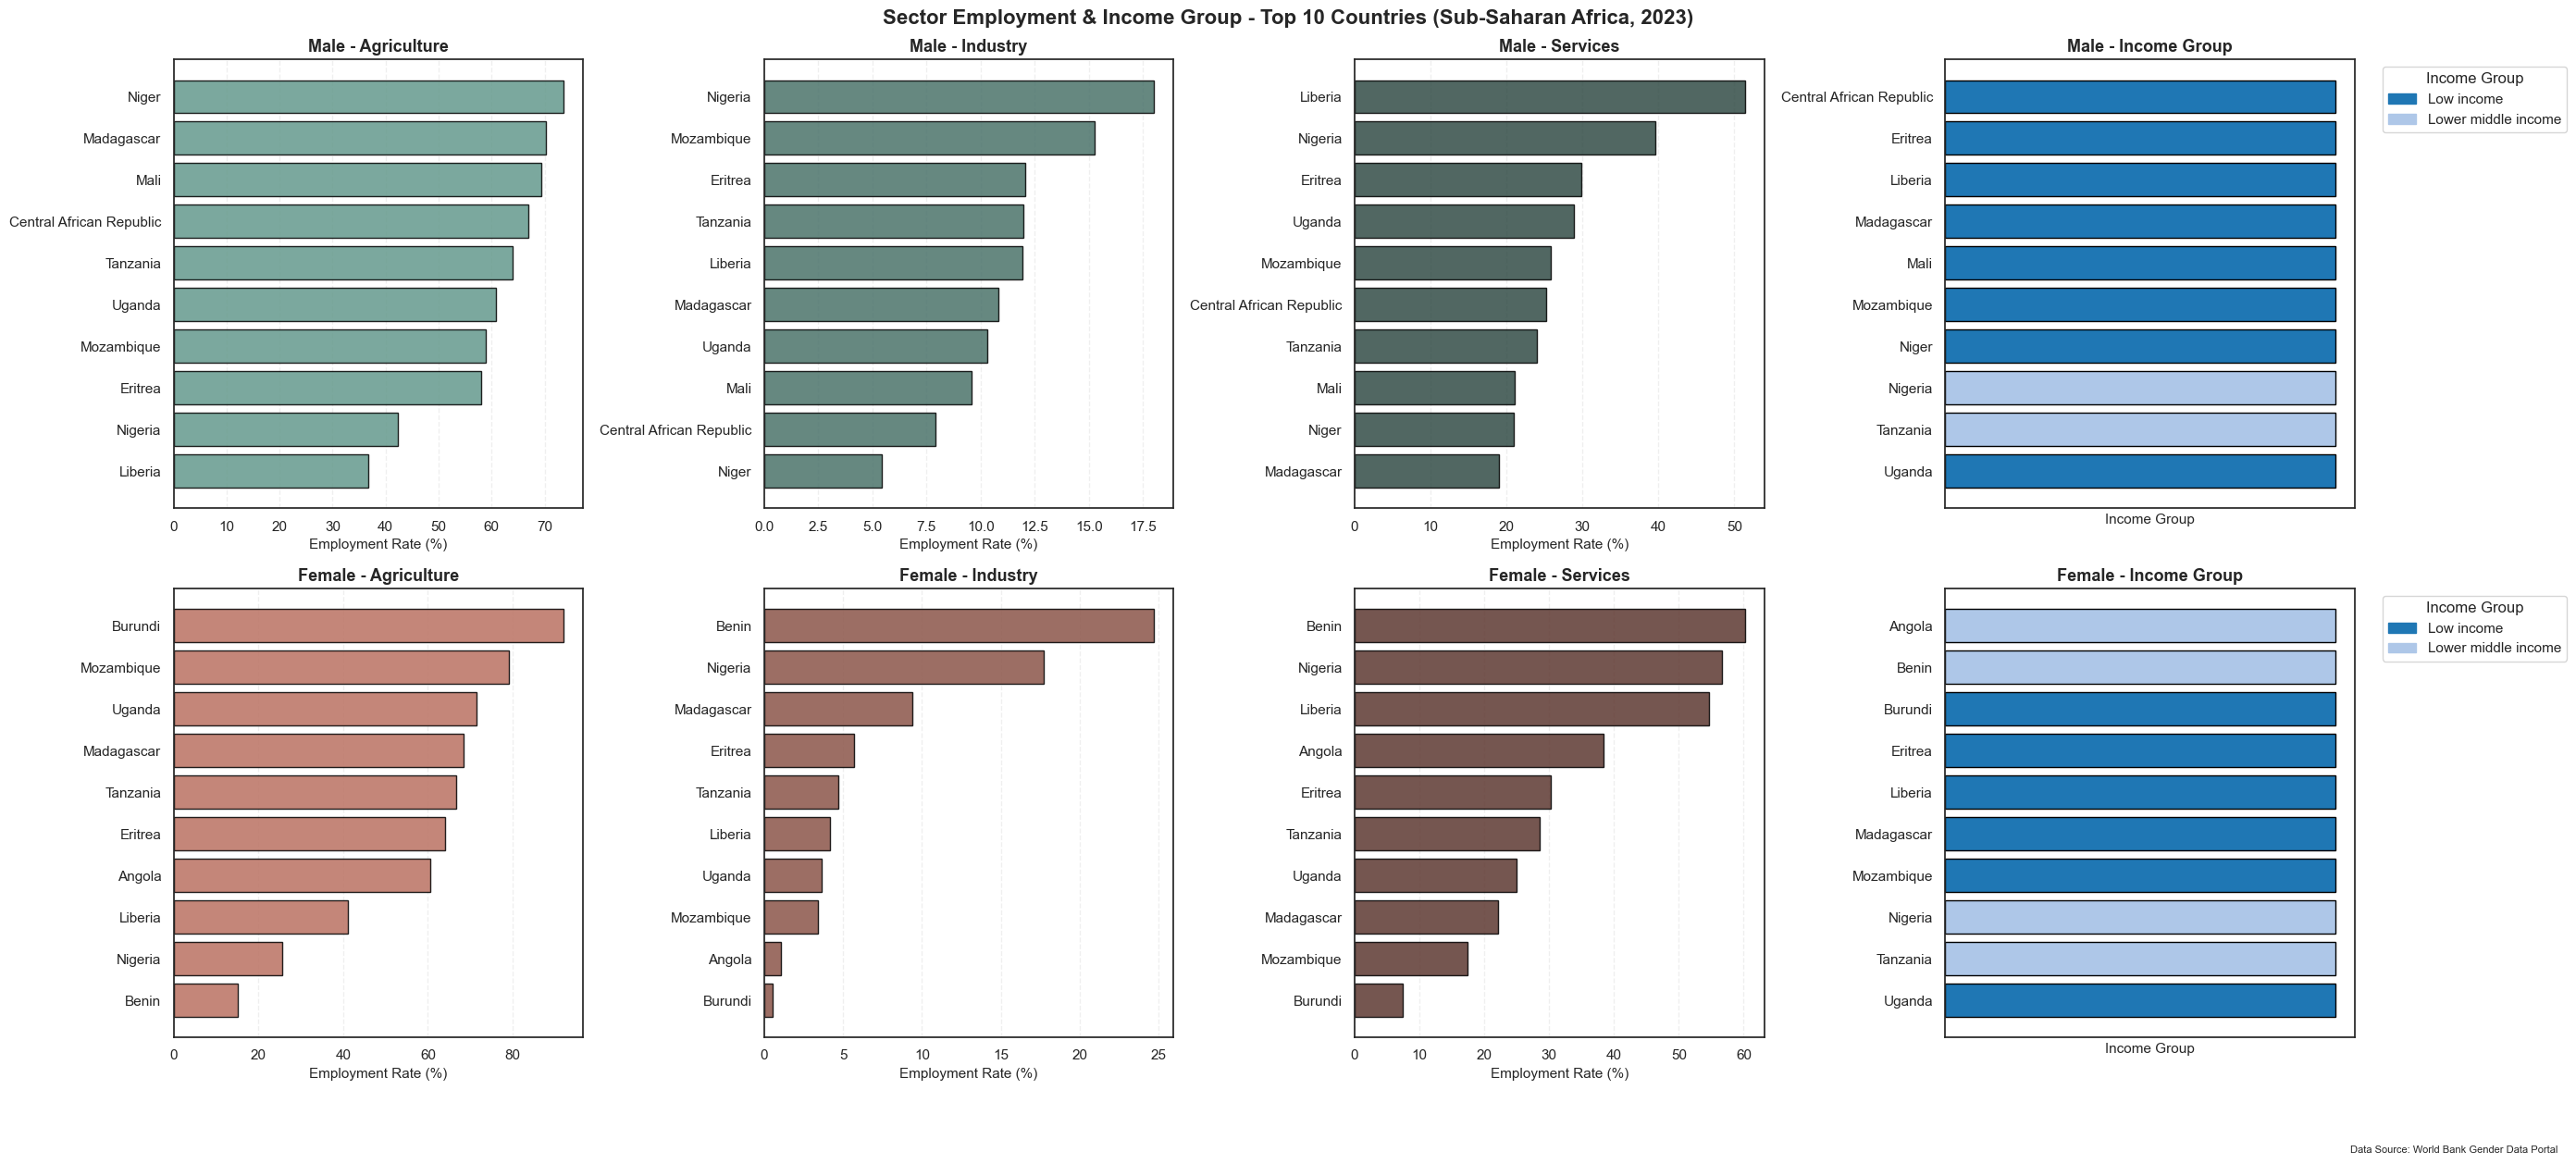

In [616]:
create_sector_dashboard_with_income(
    ssa_df,
    employment_codes,
    agriculture_codes,
    industry_codes,
    services_codes,
    region_name="Sub-Saharan Africa"
)

In [617]:
def create_unemployment_dashboard(df, unemployment_codes, region_name="Sub-Saharan Africa"):
    
    # Filter data to the chosen indicators
    data = df[df["Indicator Code"].isin(unemployment_codes)]
    
    # Define colors
    FEMALE_COLOR = "#E88D7A"
    MALE_COLOR = "#7DBFB0"
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)
    
    # ==========================================
    # Set the target year
    # ==========================================
    max_year = 2023       
    data_year = data[data['Year'] == max_year]

    # ==========================================
    # Top 10 countries by gender (current year)
    # ==========================================
    top10_male = (
        data_year[data_year["Gender"] == "Male"]
        .sort_values("Value", ascending=False)
        .head(10)
    )
    
    top10_female = (
        data_year[data_year["Gender"] == "Female"]
        .sort_values("Value", ascending=False)
        .head(10)
    )
    
    # Identify top 2 countries for trends
    top2_male_countries = top10_male.head(2)["Country Name"].tolist()
    top2_female_countries = top10_female.head(2)["Country Name"].tolist()
    
    # ==========================================
    # Trend window (15 years prior to max_year)
    # ==========================================
    min_year = max_year - 15  # last 15 years
    
    trend_data = data[
        (data['Country Name'].isin(top2_male_countries + top2_female_countries)) &
        (data['Year'] >= min_year)
    ]
    
    # Y-axis limits for trend plots
    y_limit_min = 20
    y_max = trend_data['Value'].max()
    y_limit_max = y_max + (y_max - y_limit_min) * 0.1
    
    # ==========================================
    # TOP 10 MALE COUNTRIES (2023)
    # ==========================================
    ax_male_2023 = fig.add_subplot(gs[0, 0])
    
    top10_male_sorted = top10_male.sort_values("Value", ascending=True)
    
    ax_male_2023.barh(
        top10_male_sorted["Country Name"],
        top10_male_sorted["Value"],
        color=MALE_COLOR,
        alpha=0.85,
        edgecolor="black",
        linewidth=0.5
    )
    
    ax_male_2023.set_xlabel("Unemployment Rate (%)", fontsize=11, fontweight='bold')
    ax_male_2023.set_ylabel("Country", fontsize=11, fontweight='bold')
    ax_male_2023.set_title(f"Top 10 Countries - Male Unemployment in {max_year}", fontsize=13, fontweight='bold')
    ax_male_2023.grid(axis='x', alpha=0.3, linestyle='--')
    
    # ==========================================
    # TOP 10 FEMALE COUNTRIES (2023)
    # ==========================================
    ax_female_2023 = fig.add_subplot(gs[1, 0])
    
    top10_female_sorted = top10_female.sort_values("Value", ascending=True)
    
    ax_female_2023.barh(
        top10_female_sorted["Country Name"],
        top10_female_sorted["Value"],
        color=FEMALE_COLOR,
        alpha=0.85,
        edgecolor="black",
        linewidth=0.5
    )
    
    ax_female_2023.set_xlabel("Unemployment Rate (%)", fontsize=11, fontweight='bold')
    ax_female_2023.set_ylabel("Country", fontsize=11, fontweight='bold')
    ax_female_2023.set_title(f"Top 10 Countries - Female Unemployment in {max_year}", fontsize=13, fontweight='bold')
    ax_female_2023.grid(axis='x', alpha=0.3, linestyle='--')
    
    # ==========================================
    # MALE TREND PLOTS
    # ==========================================
    male_trend_data = data[
        (data['Gender'] == 'Male') &
        (data['Country Name'].isin(top2_male_countries)) &
        (data['Year'] >= min_year)
    ]
    
    # Plot: First male country
    ax_male1 = fig.add_subplot(gs[0, 1])
    c1_data = male_trend_data[male_trend_data['Country Name'] == top2_male_countries[0]].sort_values('Year')
    
    ax_male1.plot(c1_data['Year'], c1_data['Value'],
                  marker='o', linewidth=2.5, markersize=6, color=MALE_COLOR, alpha=0.85)
    
    ax_male1.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_male1.set_ylabel("Unemployment Rate (%)", fontsize=10, fontweight='bold')
    ax_male1.set_title(f"#{1}: {top2_male_countries[0]} (Male)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_male1.grid(alpha=0.3, linestyle='--')
    ax_male1.set_ylim(y_limit_min, y_limit_max)
    ax_male1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Plot: Second male country
    ax_male2 = fig.add_subplot(gs[0, 2])
    c2_data = male_trend_data[male_trend_data['Country Name'] == top2_male_countries[1]].sort_values('Year')
    
    ax_male2.plot(c2_data['Year'], c2_data['Value'],
                  marker='o', linewidth=2.5, markersize=6, color=MALE_COLOR, alpha=0.85)
    
    ax_male2.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_male2.set_ylabel("Unemployment Rate (%)", fontsize=10, fontweight='bold')
    ax_male2.set_title(f"#{2}: {top2_male_countries[1]} (Male)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_male2.grid(alpha=0.3, linestyle='--')
    ax_male2.set_ylim(y_limit_min, y_limit_max)
    ax_male2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # ==========================================
    # FEMALE TREND PLOTS
    # ==========================================
    female_trend_data = data[
        (data['Gender'] == 'Female') &
        (data['Country Name'].isin(top2_female_countries)) &
        (data['Year'] >= min_year)
    ]
    
    # Plot: First female country
    ax_female1 = fig.add_subplot(gs[1, 1])
    c1_f_data = female_trend_data[female_trend_data['Country Name'] == top2_female_countries[0]].sort_values('Year')
    
    ax_female1.plot(c1_f_data['Year'], c1_f_data['Value'],
                    marker='o', linewidth=2.5, markersize=6, color=FEMALE_COLOR, alpha=0.85)
    
    ax_female1.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_female1.set_ylabel("Unemployment Rate (%)", fontsize=10, fontweight='bold')
    ax_female1.set_title(f"#{1}: {top2_female_countries[0]} (Female)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_female1.grid(alpha=0.3, linestyle='--')
    ax_female1.set_ylim(y_limit_min, y_limit_max)
    ax_female1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Plot: Second female country
    ax_female2 = fig.add_subplot(gs[1, 2])
    c2_f_data = female_trend_data[female_trend_data['Country Name'] == top2_female_countries[1]].sort_values('Year')
    
    ax_female2.plot(c2_f_data['Year'], c2_f_data['Value'],
                    marker='o', linewidth=2.5, markersize=6, color=FEMALE_COLOR, alpha=0.85)
    
    ax_female2.set_xlabel("Year", fontsize=10, fontweight='bold')
    ax_female2.set_ylabel("Unemployment Rate (%)", fontsize=10, fontweight='bold')
    ax_female2.set_title(f"#{2}: {top2_female_countries[1]} (Female)\n15-Year Trend", fontsize=11, fontweight='bold')
    ax_female2.grid(alpha=0.3, linestyle='--')
    ax_female2.set_ylim(y_limit_min, y_limit_max)
    ax_female2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # ==========================================
    # Main Title
    # ==========================================
    plt.suptitle(
        f"Unemployment Dashboard - {region_name} ({max_year})\nCurrent Leaders and Their 15-Year Trends",
        fontsize=16,
        fontweight='bold',
        y=0.99
    )
    
    plt.tight_layout()
    # ----- DATA SOURCE -----
    plt.figtext(
    0.99, -0.05,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=8)

    # Save the figure
    plt.savefig("Unmployment.png", dpi=300, bbox_inches="tight")

    # Display the plot
    plt.show()

   


/var/folders/wg/mg55sf9s133g_84ppxcs9_bc0000gn/T/ipykernel_7178/3801518714.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


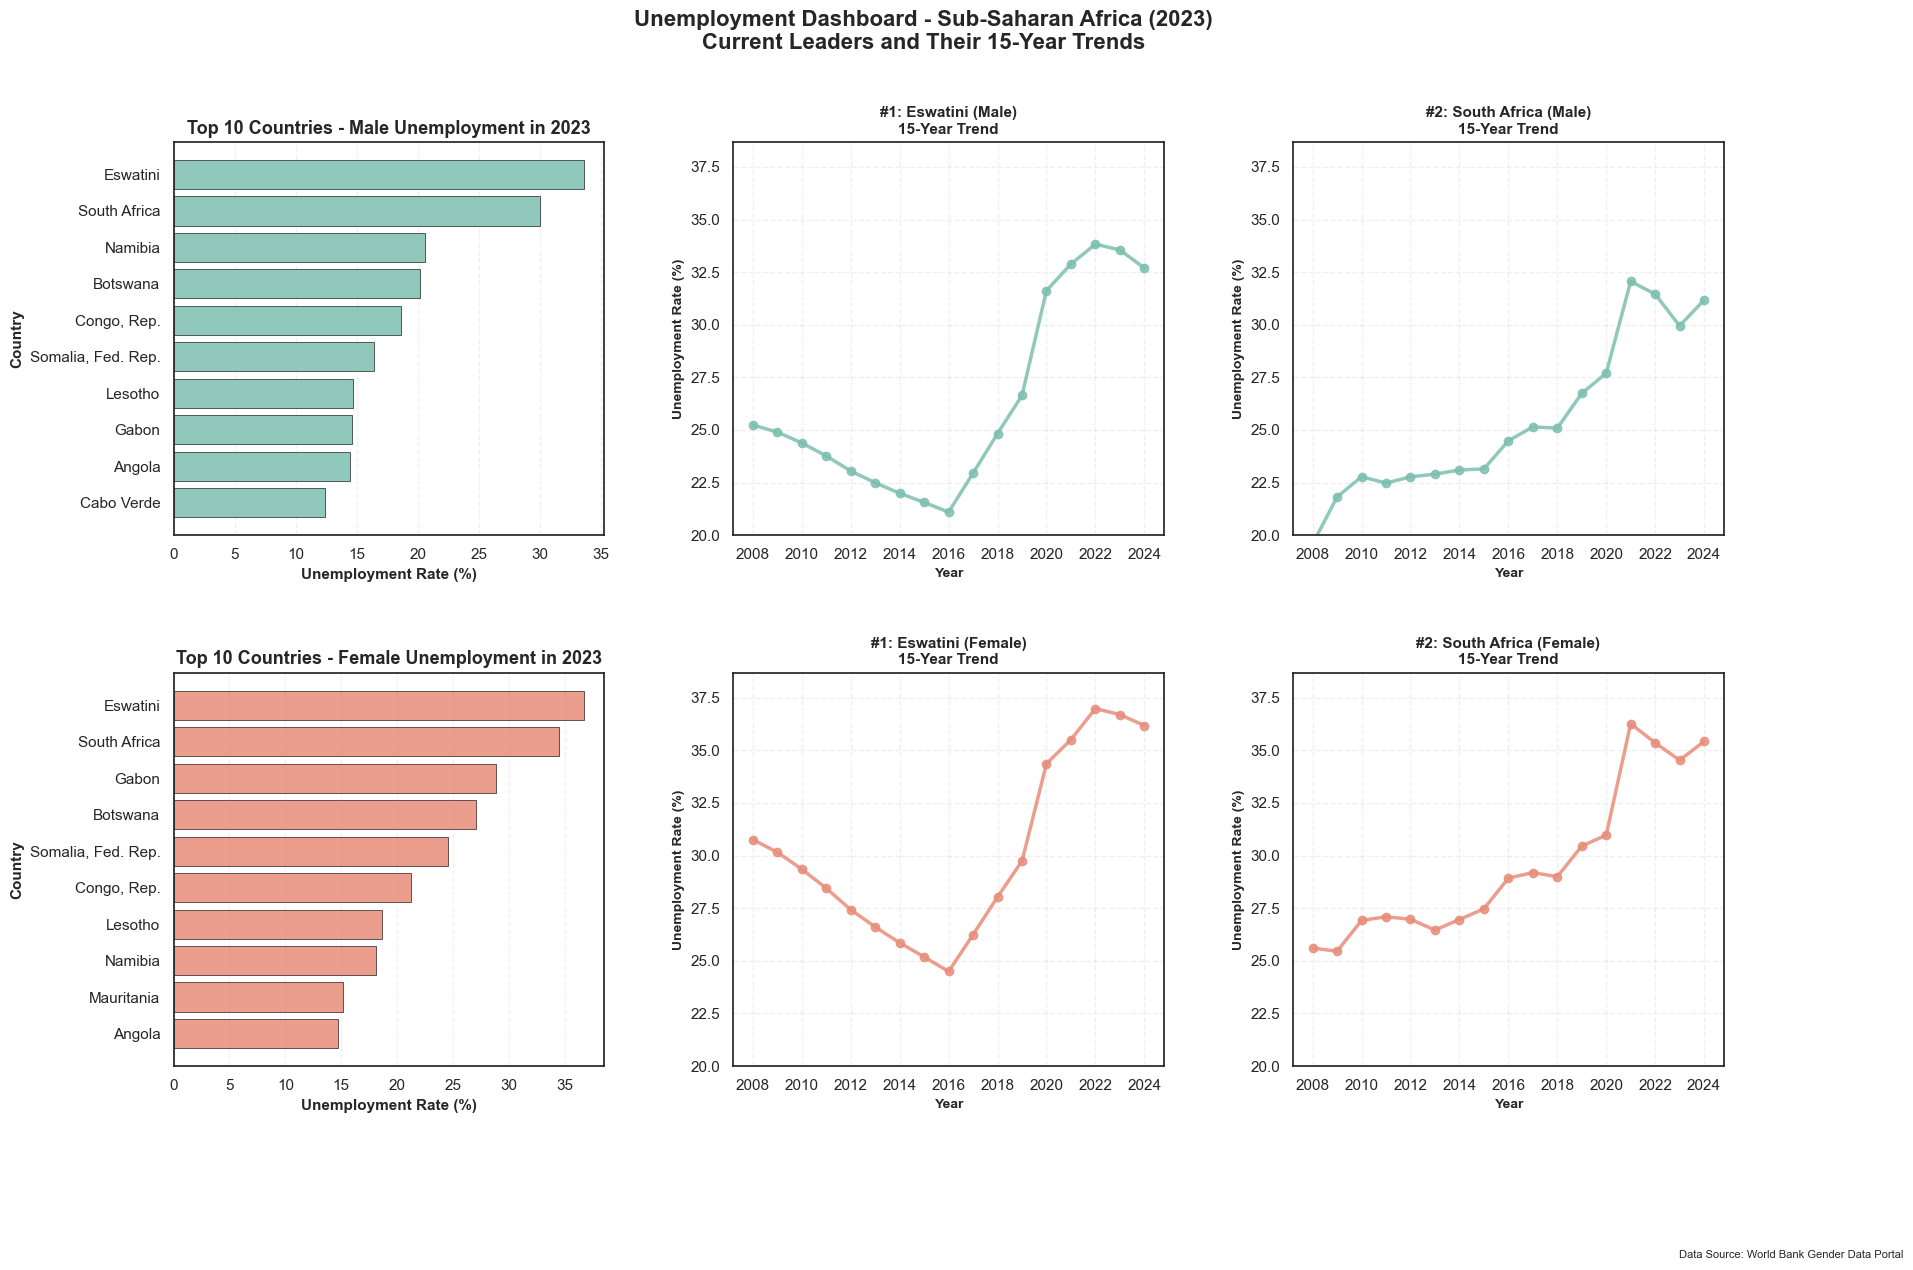

In [618]:
create_unemployment_dashboard(
    ssa_df,
    unemployment_codes,
    region_name="Sub-Saharan Africa")


In [585]:
def create_sector_dashboard_with_income_un(df, unemployment_codes,
                                       agriculture_codes, industry_codes, services_codes,
                                       region_name="Sub-Saharan Africa"):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors

    max_year = 2023

    # Base gender colors
    FEMALE_COLOR = "#E88D7A"
    MALE_COLOR = "#7DBFB0"

    # Slightly darker shades for sectors
    def darken_color(color, factor=0.8):
        c = mcolors.to_rgb(color)
        return (c[0]*factor, c[1]*factor, c[2]*factor)

    sector_colors = {
        "Male": {
            "Agriculture": darken_color(MALE_COLOR, 0.8),
            "Industry": darken_color(MALE_COLOR, 0.6),
            "Services": darken_color(MALE_COLOR, 0.4)
        },
        "Female": {
            "Agriculture": darken_color(FEMALE_COLOR, 0.8),
            "Industry": darken_color(FEMALE_COLOR, 0.6),
            "Services": darken_color(FEMALE_COLOR, 0.4)
        }
    }

    # ---- STEP 1: Determine top 10 countries based on employment codes ----
    data_2023 = df[df["Year"] == max_year]

    top10_male = (
        data_2023[(data_2023["Indicator Code"].isin(unemployment_codes)) & 
                  (data_2023["Gender"] == "Male")]
        .sort_values("Value", ascending=False)
        .head(10)["Country Name"]
        .tolist()
    )

    top10_female = (
        data_2023[(data_2023["Indicator Code"].isin(unemployment_codes)) & 
                  (data_2023["Gender"] == "Female")]
        .sort_values("Value", ascending=False)
        .head(10)["Country Name"]
        .tolist()
    )

    # ---- STEP 2: Create figure with 2 rows, 4 columns ----
    fig, axes = plt.subplots(2, 4, figsize=(28, 12), sharey=False)
    sector_groups = {"Agriculture": agriculture_codes, "Industry": industry_codes, "Services": services_codes}

    for row, (gender, top10_countries) in enumerate([("Male", top10_male), ("Female", top10_female)]):
        for col, (sector_label, code_list) in enumerate(sector_groups.items()):
            ax = axes[row, col]

            # Filter data for this sector, this gender, top10 countries
            sector_df = df[
                (df["Indicator Code"].isin(code_list)) &
                (df["Gender"] == gender) &
                (df["Year"] == max_year) &
                (df["Country Name"].isin(top10_countries))
            ]

            # Sort from highest to lowest value
            sector_df = sector_df.sort_values("Value", ascending=False)

            # Plot
            ax.barh(sector_df["Country Name"], sector_df["Value"],
                    color=sector_colors[gender][sector_label], edgecolor="black", alpha=0.85)
            ax.set_xlabel("Unemployment Rate (%)", fontsize=11)
            ax.set_title(f"{gender} - {sector_label}", fontsize=13, fontweight="bold")
            ax.grid(axis="x", linestyle="--", alpha=0.3)
            ax.invert_yaxis()  # So highest value is on top

        # ---- STEP 3: Income Group plot in last column ----
        ax_income = axes[row, 3]  # Last column

        income_df = df[(df["Country Name"].isin(top10_countries)) & (df["Year"] == max_year)]
        income_df = income_df[["Country Name", "Income Group"]].drop_duplicates()
        income_df = income_df.sort_values("Country Name", ascending=False)

        # Assign a color for each income group
        income_groups = income_df["Income Group"].unique()
        colors = plt.cm.tab20.colors[:len(income_groups)]
        color_map = dict(zip(income_groups, colors))

        ax_income.barh(income_df["Country Name"], [1]*len(income_df),
                       color=income_df["Income Group"].map(color_map), edgecolor="black")
        ax_income.set_xlabel("Income Group", fontsize=11)
        ax_income.set_yticks(range(len(income_df)))
        ax_income.set_yticklabels(income_df["Country Name"])
        ax_income.set_xticks([])
        ax_income.set_title(f"{gender} - Income Group", fontsize=13, fontweight="bold")

        # Legend
        handles = [plt.Rectangle((0,0),1,1,color=color_map[grp]) for grp in income_groups]
        ax_income.legend(handles, income_groups, title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f"Sector Unemployment & Income Group - Top 10 Countries ({region_name}, {max_year})",
                 fontsize=16, fontweight="bold")
    plt.tight_layout()

    plt.tight_layout()
    # ----- DATA SOURCE -----
    plt.figtext(
    0.99, -0.05,
    "Data Source: World Bank Gender Data Portal",
    ha="right",
    fontsize=8)

    # Save the figure
    plt.savefig("Unemployment2.png", dpi=300, bbox_inches="tight")

    plt.show()


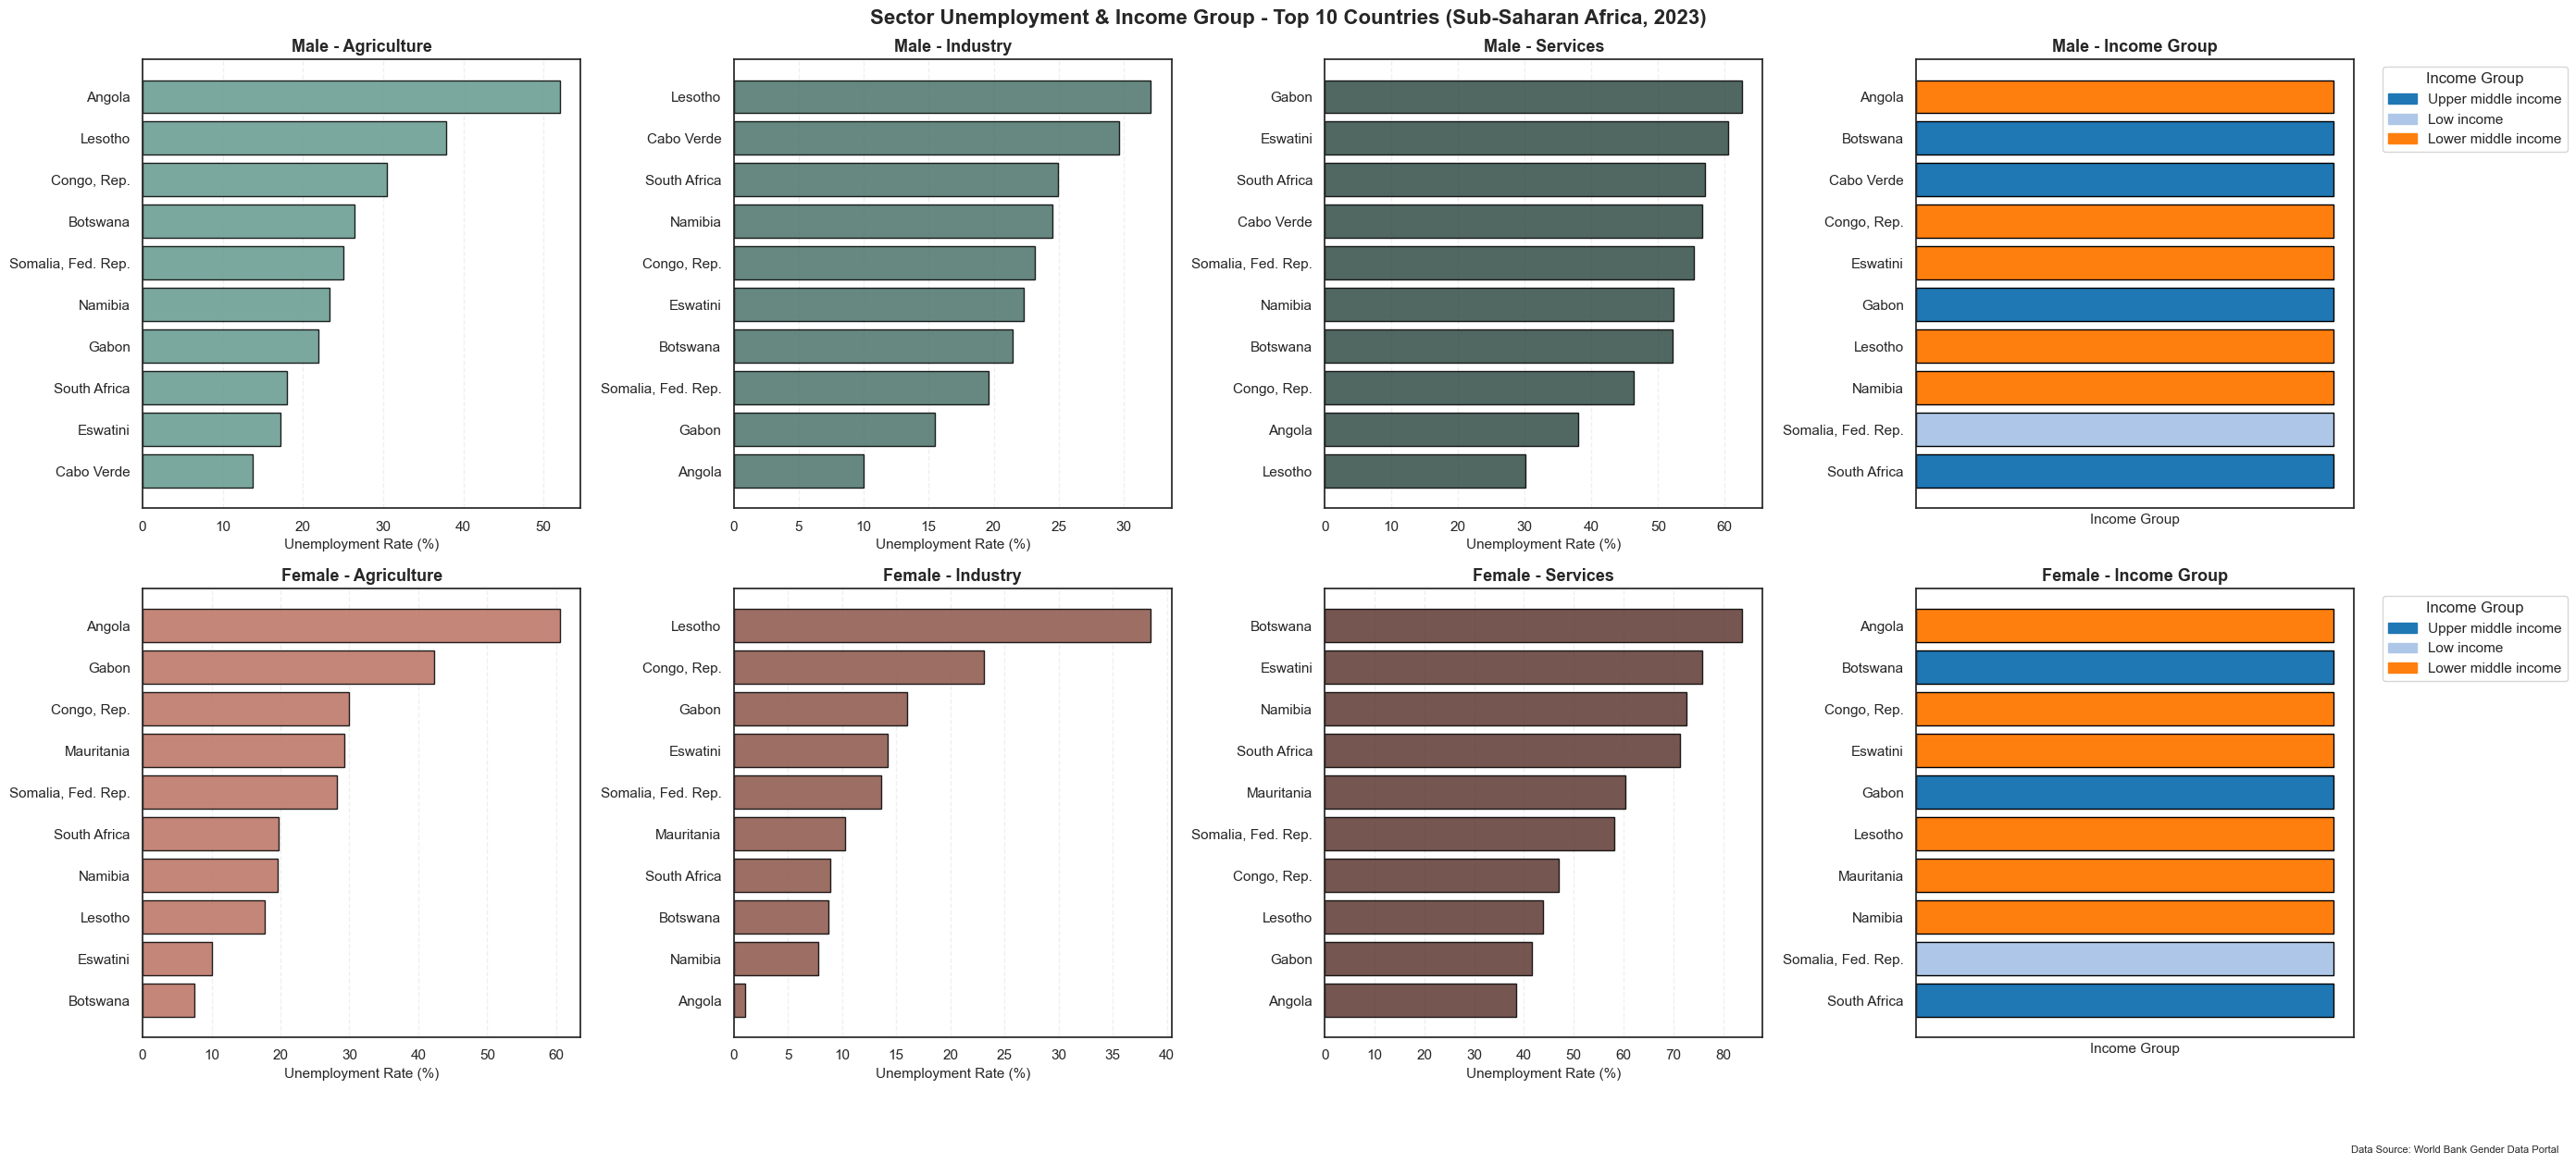

In [619]:
create_sector_dashboard_with_income_un(
    ssa_df,
    unemployment_codes,
    agriculture_codes,
    industry_codes,
    services_codes,
    region_name="Sub-Saharan Africa"
)